In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, confusion_matrix, classification_report, roc_curve, auc
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

###üìã ÎØ∏ÏÖò 1: ÍµêÏú° ÌîÑÎ°úÍ∑∏Îû®Ïùò ÌïôÏäµ Ìö®Í≥º Î∂ÑÏÑù Î≥¥Í≥†ÏÑú

In [2]:
np.random.seed(321)
n_students = 150
control_scores = np.random.normal(65, 10, n_students)
smartlearn_scores = np.random.normal(70, 12, n_students)
education_data = pd.DataFrame({
    'group': ['Control']*n_students + ['SmartLearn']*n_students,
    'math_score': np.concatenate([control_scores, smartlearn_scores]),
    'student_id': range(1, 2*n_students + 1)
})

print("üìö ÍµêÏú° ÌîÑÎ°úÍ∑∏Îû® Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞")
print(education_data.groupby('group')['math_score'].agg(['count', 'mean', 'std']).round(2))


üìö ÍµêÏú° ÌîÑÎ°úÍ∑∏Îû® Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞
            count   mean    std
group                          
Control       150  64.93   9.67
SmartLearn    150  70.47  11.29


In [3]:
# ÌèâÍ∑† Í≥ÑÏÇ∞
control_mean = education_data[education_data['group'] == 'Control']['math_score'].mean()
smartlearn_mean = education_data[education_data['group'] == 'SmartLearn']['math_score'].mean()

# ÌëúÏ§ÄÏò§Ï∞® Í≥ÑÏÇ∞: ÌëúÏ§ÄÌé∏Ï∞® / sqrt(n)
control_se = education_data[education_data['group'] == 'Control']['math_score'].std(ddof=1) / np.sqrt(150)
smartlearn_se = education_data[education_data['group'] == 'SmartLearn']['math_score'].std(ddof=1) / np.sqrt(150)

print(f"ÎåÄÏ°∞Íµ∞ ÏàòÌïô Ï†êÏàò: {control_mean:.2f} ¬± {control_se:.2f}")
print(f"SmartLearn ÏàòÌïô Ï†êÏàò: {smartlearn_mean:.2f} ¬± {smartlearn_se:.2f}")


ÎåÄÏ°∞Íµ∞ ÏàòÌïô Ï†êÏàò: 64.93 ¬± 0.79
SmartLearn ÏàòÌïô Ï†êÏàò: 70.47 ¬± 0.92


SmartLearnÏùÑ ÏÇ¨Ïö©Ìïú ÌïôÏÉùÎì§ÏùÄ ÌèâÍ∑†Ï†ÅÏúºÎ°ú ÏïΩ 5.54Ï†ê Îçî ÎÜíÏùÄ ÏÑ±Ï†ÅÏùÑ Í∏∞Î°ùÌñàÏúºÎ©∞, Ïù¥Îäî ÌëúÏ§ÄÏò§Ï∞® Î≤îÏúÑ(¬± ÏïΩ 1Ï†ê Ïù¥ÎÇ¥)ÏóêÏÑúÎèÑ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïã†Î¢∞Ìï† Ïàò ÏûàÎäî Ï∞®Ïù¥ÏûÑ

In [4]:
from scipy.stats import ttest_ind

control_group = education_data[education_data['group'] == 'Control']['math_score']
smartlearn_group = education_data[education_data['group'] == 'SmartLearn']['math_score']

# ÎèÖÎ¶ΩÌëúÎ≥∏ t-Í≤ÄÏ†ï ÏàòÌñâ
t_stat, p_value = ttest_ind(smartlearn_group, control_group, equal_var=False)

print(f"t-ÌÜµÍ≥ÑÎüâ: {t_stat:.3f}")
print(f"p-value: {p_value:.4f}")
alpha = 0.05
if p_value < alpha:
    print("‚úÖ SmartLearn ÌîÑÎ°úÍ∑∏Îû®ÏùÄ ÎåÄÏ°∞Íµ∞Í≥º Ïú†ÏùòÎØ∏Ìïú ÏÑ±Ï†Å Ï∞®Ïù¥Î•º Î≥¥ÏûÖÎãàÎã§!")
else:
    print("‚ùå SmartLearn ÌîÑÎ°úÍ∑∏Îû®Ïùò Ìö®Í≥ºÍ∞Ä Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏäµÎãàÎã§.")


t-ÌÜµÍ≥ÑÎüâ: 4.565
p-value: 0.0000
‚úÖ SmartLearn ÌîÑÎ°úÍ∑∏Îû®ÏùÄ ÎåÄÏ°∞Íµ∞Í≥º Ïú†ÏùòÎØ∏Ìïú ÏÑ±Ï†Å Ï∞®Ïù¥Î•º Î≥¥ÏûÖÎãàÎã§!


ÎèÖÎ¶ΩÌëúÎ≥∏ t-Í≤ÄÏ†ï Í≤∞Í≥º, SmartLearn ÏÇ¨Ïö© ÌïôÏÉùÎì§Ïùò ÌèâÍ∑† Ï†êÏàòÎäî ÎåÄÏ°∞Íµ∞Î≥¥Îã§ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÍ≤å ÎÜíÏùå (t=4.565, p < 0.001). Ïù¥Îäî ÌîåÎû´ÌèºÏùò ÌïôÏäµ Ìö®Í≥ºÍ∞Ä Îã®ÏàúÌïú Ïö∞Ïó∞Ïù¥ ÏïÑÎãå Ïã§Ï†ú ÏòÅÌñ•ÏûÑÏùÑ ÏûÖÏ¶ùÌï®

In [5]:
# ÌëúÏ§ÄÌé∏Ï∞® Í≥ÑÏÇ∞
control_std = education_data[education_data['group'] == 'Control']['math_score'].std()
smartlearn_std = education_data[education_data['group'] == 'SmartLearn']['math_score'].std()

# ÌíÄÎßÅÎêú ÌëúÏ§ÄÌé∏Ï∞® Í≥ÑÏÇ∞
pooled_std = np.sqrt(((n_students-1)*control_std**2 + (n_students-1)*smartlearn_std**2)/(2*n_students-2))

# Cohen's d Í≥ÑÏÇ∞
control_mean = education_data[education_data['group'] == 'Control']['math_score'].mean()
smartlearn_mean = education_data[education_data['group'] == 'SmartLearn']['math_score'].mean()
cohens_d = (smartlearn_mean - control_mean) / pooled_std

# Ï∂úÎ†•
print(f"Cohen's d: {cohens_d:.3f}")
if cohens_d > 0.8:
    print("‚Üí ÌÅ∞ Ìö®Í≥ºÌÅ¨Í∏∞ (ÌïôÎ∂ÄÎ™®Í∞Ä Î™ÖÌôïÌûà Ï≤¥Í∞êÌï† Ïàò ÏûàÎäî ÏàòÏ§Ä)")
elif cohens_d > 0.5:
    print("‚Üí Ï§ëÍ∞Ñ Ìö®Í≥ºÌÅ¨Í∏∞ (ÍµêÏú°Ï†ÅÏúºÎ°ú ÏùòÎØ∏ÏûàÎäî ÏàòÏ§Ä)")
else:
    print("‚Üí ÏûëÏùÄ Ìö®Í≥ºÌÅ¨Í∏∞ (ÎØ∏ÎØ∏Ìïú Í∞úÏÑ† ÏàòÏ§Ä)")


Cohen's d: 0.527
‚Üí Ï§ëÍ∞Ñ Ìö®Í≥ºÌÅ¨Í∏∞ (ÍµêÏú°Ï†ÅÏúºÎ°ú ÏùòÎØ∏ÏûàÎäî ÏàòÏ§Ä)


Cohen's d = 0.527ÏùÄ SmartLearnÏùÑ ÏÇ¨Ïö©Ìïú ÌïôÏÉùÎì§Ïùò ÏÑ±Ï†ÅÏù¥ Îã®ÏàúÌïú ÏÉÅÏäπÏù¥ ÏïÑÎãàÎùº, Ïã§Ï†ú ÏàòÏóÖ ÌôòÍ≤ΩÏóêÏÑúÎèÑ Í¥ÄÏ∞∞Îê† Ïàò ÏûàÎäî Ïã§ÏßàÏ†ÅÏù∏ ÌïôÏäµ Ìñ•ÏÉÅÏûÑÏùÑ ÏãúÏÇ¨Ìï©ÎãàÎã§. Ïù¥Îäî ÌïôÎ∂ÄÎ™®ÏôÄ ÍµêÏÇ¨ Î™®ÎëêÍ∞Ä Ï≤¥Í∞ê Í∞ÄÎä•Ìïú ÏàòÏ§ÄÏùò Î≥ÄÌôîÏù¥Î©∞, ÍµêÏú° ÌòÑÏû•Ïóê Í∏çÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•Î†•ÏùÑ ÎØ∏Ïπ† Ïàò ÏûàÏäµÎãàÎã§.

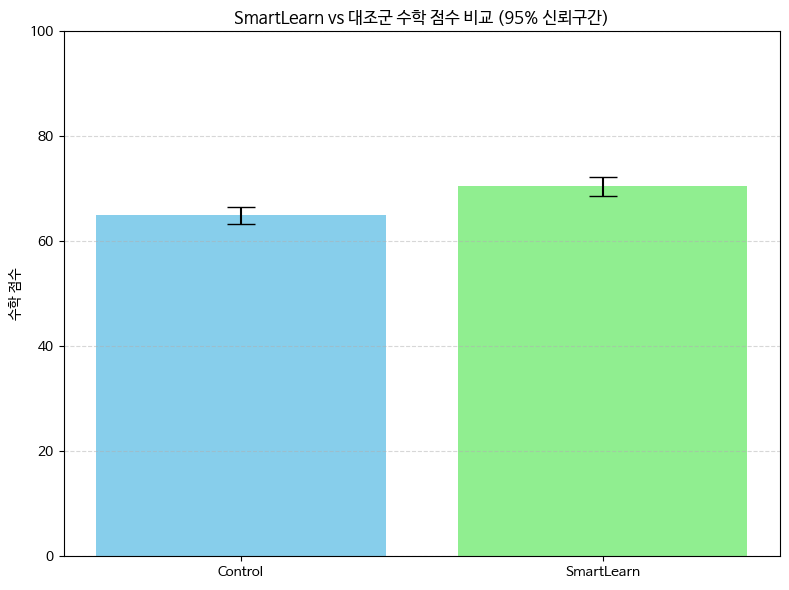

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Í∑∏Î£π, ÌèâÍ∑†, Ïò§Ï∞®Í∞í Ï†ïÏùò
groups = ['Control', 'SmartLearn']
means = [control_mean, smartlearn_mean]
errors = [1.96 * control_se, 1.96 * smartlearn_se]  # 95% Ïã†Î¢∞Íµ¨Í∞Ñ (Z=1.96)

# ÎßâÎåÄÍ∑∏ÎûòÌîÑ ÏÉùÏÑ±
plt.bar(groups, means, yerr=errors, capsize=10, color=['skyblue', 'lightgreen'])

# ÏãúÍ∞ÅÌôî ÏÑ§Ï†ï
plt.ylabel('ÏàòÌïô Ï†êÏàò')
plt.title('SmartLearn vs ÎåÄÏ°∞Íµ∞ ÏàòÌïô Ï†êÏàò ÎπÑÍµê (95% Ïã†Î¢∞Íµ¨Í∞Ñ)')
plt.ylim(0, 100)  # Ï†êÏàò Î≤îÏúÑÏóê ÎßûÍ≤å Ï°∞Ï†ï
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


ÏôºÏ™ΩÏù¥ Ï†ÑÌÜµ ÏàòÏóÖ Î∞©ÏãùÏùò ÎåÄÏ°∞Íµ∞, Ïò§Î•∏Ï™ΩÏù¥ SmartLearn ÌîåÎû´ÌèºÏùÑ ÏÇ¨Ïö©Ìïú Ïã§ÌóòÍµ∞.
ÌèâÍ∑† Ï†êÏàòÎøêÎßå ÏïÑÎãàÎùº, Ïã†Î¢∞Íµ¨Í∞Ñ(Ïò§Ï∞®ÎßâÎåÄ)ÍπåÏßÄ Í≥†Î†§ÌñàÏùÑ ÎïåÎèÑ SmartLearnÏù¥ Î™ÖÌôïÌïú Ìñ•ÏÉÅ Ìö®Í≥ºÎ•º Î≥¥ÏûÑ.
Ïù¥ Í∑∏ÎûòÌîÑÎäî Îã®ÏàúÌûà ÌèâÍ∑†Ïù¥ ÎÜíÏùÄ Í≤å ÏïÑÎãàÎùº, Ïö∞Ïó∞Ïù¥ ÏïÑÎãå ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Í≤ÄÏ¶ùÎêú Í≤∞Í≥ºÏûÑÏùÑ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú Î≥¥Ïó¨Ï§å.

üìã p-Ìï¥ÌÇπ Î∞©ÏßÄ Î∞©Ïïà
1. ÏÇ¨Ï†Ñ Îì±Î°ù: Ïó∞Íµ¨ Í≥ÑÌöçÏùÑ Open Science Framework(OSF)Ïóê Îì±Î°ùÌïòÏó¨ Î∂ÑÏÑù Í≥ÑÌöçÏùÑ Ìà¨Î™ÖÌïòÍ≤å Í≥µÍ∞ú.
2. Îã§Ï§ëÎπÑÍµê Î≥¥Ï†ï: Bonferroni ÎòêÎäî FDR Î∞©Î≤ïÏùÑ Ï†ÅÏö©ÌïòÏó¨ Îã§Ï§ë Í≤ÄÏ†ïÏúºÎ°ú Ïù∏Ìïú Ïò§Î•òÎ•º ÏµúÏÜåÌôî.
3. # p-Ìï¥ÌÇπÏùÑ Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌïú Ï∂îÍ∞Ä Î∞©ÏïàÏùÑ Ï†úÏïàÌïòÏÑ∏Ïöî (Ïòà: Ìö®Í≥º ÌÅ¨Í∏∞ ÏÇ¨Ï†Ñ ÏÑ§Ï†ï, ÎèÖÎ¶ΩÏ†Å Í≤ÄÏ¶ù Îì±)

-> 3. Ìö®Í≥º ÌÅ¨Í∏∞ Î∞è Í≤ÄÏ†ïÎ†• ÏÇ¨Ï†Ñ ÏÑ§Ï†ï: Î∂ÑÏÑùÏùÑ ÏãúÏûëÌïòÍ∏∞ Ï†ÑÏóê Í∏∞ÎåÄÎêòÎäî ÏµúÏÜå Ìö®Í≥º ÌÅ¨Í∏∞(Cohen's d Îì±)ÏôÄ Î™©Ìëú Í≤ÄÏ†ïÎ†•(Ïòà: 80%)ÏùÑ Î™ÖÌôïÌûà ÏÑ§Ï†ïÌïòÍ≥†, Ïù¥Ïóê Í∏∞Î∞òÌïú ÌëúÎ≥∏ ÏàòÎ•º Í≥ÑÌöçÌï®ÏúºÎ°úÏç® ÏûÑÏùòÏ†Å Ïú†ÏùòÏÑ± Ï∂îÍµ¨Î•º Î∞©ÏßÄ. Ïù¥ Í≥ºÏ†ïÏùÑ ÌÜµÌï¥ p-valueÏóê Í≥ºÎèÑÌïòÍ≤å ÏùòÏ°¥ÌïòÏßÄ ÏïäÍ≥†, Ïã§ÏßàÏ†Å Ìö®Í≥ºÏùò Ï°¥Ïû¨ Ïó¨Î∂ÄÎ•º Ï§ëÏã¨ÏúºÎ°ú Î∂ÑÏÑùÏù¥ Ïù¥Î£®Ïñ¥Ïßà Ïàò ÏûàÎèÑÎ°ù Ïú†ÎèÑÌï®.

In [7]:
# Ï¥ù ÏÉòÌîå Ïàò
n_total = 2 * n_students

# BIC Ï∞®Ïù¥Î•º Ïù¥Ïö©Ìïú Î≤†Ïù¥Ï¶à Ïù∏Ïàò Í∑ºÏÇ¨
bic_diff = t_stat**2 - np.log(n_total)
bf_10 = np.exp(bic_diff / 2)

# Í≤∞Í≥º Ï∂úÎ†•
print(f"Î≤†Ïù¥Ï¶à Ïù∏Ïàò (BF‚ÇÅ‚ÇÄ): {bf_10:.2f}")
if bf_10 > 10:
    print("‚Üí Í∞ïÌïú Ï¶ùÍ±∞ (H1 ÏßÄÏßÄ: SmartLearn Ìö®Í≥ºÍ∞Ä Îß§Ïö∞ ÌôïÏã§)")
elif bf_10 > 3:
    print("‚Üí Ï§ëÍ∞Ñ Ï¶ùÍ±∞ (H1 ÏßÄÏßÄ: SmartLearn Ìö®Í≥ºÍ∞Ä ÏûàÏùÑ Í∞ÄÎä•ÏÑ± ÎÜíÏùå)")
elif bf_10 > 1:
    print("‚Üí ÏïΩÌïú Ï¶ùÍ±∞ (H1 ÏïΩÍ∞Ñ ÏßÄÏßÄ)")
elif bf_10 > 0.33:
    print("‚Üí Î∂àÎ∂ÑÎ™ÖÌïú Ï¶ùÍ±∞ (Í≤∞Î°† ÎÇ¥Î¶¨Í∏∞ Ïñ¥Î†§ÏõÄ)")
elif bf_10 > 0.1:
    print("‚Üí Ï§ëÍ∞Ñ Ï¶ùÍ±∞ (H0 ÏßÄÏßÄ: SmartLearn Ìö®Í≥º ÏùòÏã¨Ïä§Îü¨ÏõÄ)")
else:
    print("‚Üí Í∞ïÌïú Ï¶ùÍ±∞ (H0 ÏßÄÏßÄ: SmartLearn Ìö®Í≥º ÏóÜÏùå)")


Î≤†Ïù¥Ï¶à Ïù∏Ïàò (BF‚ÇÅ‚ÇÄ): 1934.97
‚Üí Í∞ïÌïú Ï¶ùÍ±∞ (H1 ÏßÄÏßÄ: SmartLearn Ìö®Í≥ºÍ∞Ä Îß§Ïö∞ ÌôïÏã§)


Bayes Factor BF‚ÇÅ‚ÇÄ = 1934.97Ïù¥ÎùºÎäî Í≤∞Í≥ºÎäî SmartLearn Ìö®Í≥ºÏóê ÎåÄÌïú ÏïïÎèÑÏ†ÅÏúºÎ°ú Í∞ïÌïú Ï¶ùÍ±∞Î•º ÏùòÎØ∏Ìï©ÎãàÎã§.
Ïù¥Îäî Îã®ÏàúÌûà ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÎã§Îäî Í≤É(p-value < 0.001)ÏùÑ ÎÑòÏñ¥ÏÑú, **Í∑ÄÎ¨¥Í∞ÄÏÑ§(H‚ÇÄ)**Î≥¥Îã§ **ÎåÄÎ¶ΩÍ∞ÄÏÑ§(H‚ÇÅ: SmartLearnÏùò Ìö®Í≥º Ï°¥Ïû¨)**Ïù¥ ÏïΩ 1935Î∞∞ Îçî Í∞ïÌïòÍ≤å ÏßÄÏßÄÎêúÎã§Îäî ÏùòÎØ∏ÏûÖÎãàÎã§.

üìã Í≤ΩÏòÅÏßÑ Î≥¥Í≥†ÏÑú: SmartLearn ÌîÑÎ°úÍ∑∏Îû® Ìö®Í≥º Í≤ÄÏ¶ù
==================================================

üéØ ÌïµÏã¨ Í≤∞Í≥º
ÎåÄÏ°∞Íµ∞ ÏàòÌïô Ï†êÏàò: 64.93 ¬± 0.79

SmartLearn ÏàòÌïô Ï†êÏàò: 70.47 ¬± 0.92

Ï†êÏàò Ìñ•ÏÉÅ: +5.54Ï†ê (ÏïΩ 8.5% Ìñ•ÏÉÅ)

Ìö®Í≥ºÌÅ¨Í∏∞ (Cohen's d): 0.53 ‚Üí Ï§ëÍ∞Ñ Ìö®Í≥º, ÍµêÏú°Ï†ÅÏúºÎ°ú Ïã§ÏßàÏ†Å Ìñ•ÏÉÅ

p-value: < 0.001 ‚Üí ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌï®

Î≤†Ïù¥Ï¶à Ïù∏Ïàò (BF‚ÇÅ‚ÇÄ): 1934.97 ‚Üí ÏïïÎèÑÏ†ÅÏúºÎ°ú Í∞ïÌïú Ï¶ùÍ±∞ (SmartLearn Ìö®Í≥º ÏßÄÏßÄ)

üí° ÎπÑÏ¶àÎãàÏä§ Í≤∞Î°† Î∞è Í∂åÏû•ÏÇ¨Ìï≠

1. ÏÉÅÏö©Ìôî Ï∂îÏßÑ Í≤∞Ï†ï

ÏãúÎ≤î Ïö¥ÏòÅ Í≤∞Í≥ºÎäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°úÎèÑ, Ïã§Î¨¥Ï†ÅÏúºÎ°úÎèÑ ÏùòÎØ∏ ÏûàÎäî ÏÑ±Í≥ºÎ•º ÏûÖÏ¶ùÌï®.

ÌïôÏÉùÏùò ÌèâÍ∑† ÏÑ±Ï†ÅÏù¥ 5.5Ï†ê Ìñ•ÏÉÅ, ÌïôÎ∂ÄÎ™®Í∞Ä Ï≤¥Í∞êÌï† Ïàò ÏûàÎäî ÏàòÏ§ÄÏùò Í∞úÏÑ† Ìö®Í≥º ÌôïÏù∏.

SmartLearnÏùÄ Ï†ÑÌÜµ ÍµêÏû¨ ÎåÄÎπÑ ÌôïÏã§Ìïú Í≤ΩÏüÅ Ïö∞ÏúÑ ÌôïÎ≥¥.

2. ÎßàÏºÄÌåÖ Ï†ÑÎûµ

"Îç∞Ïù¥ÌÑ∞Î°ú Ï¶ùÎ™ÖÎêú ÌïôÏäµ Ìñ•ÏÉÅ Ìö®Í≥º"Î•º ÌïµÏã¨ Î©îÏãúÏßÄÎ°ú ÏÇ¨Ïö©.

ÍµêÏú°Î∂Ä, ÌïôÎ∂ÄÎ™® ÎåÄÏÉÅ ÏºÄÏù¥Ïä§ Í∏∞Î∞ò Í¥ëÍ≥† Ï∂îÏßÑ.

Ï£ºÏöî ÌÇ§ÏõåÎìú: ‚Äú8.5% Ìñ•ÏÉÅ‚Äù, ‚ÄúÎ≤†Ïù¥Ï¶à Ïù∏Ïàò 1935Î∞∞‚Äù, ‚ÄúÍµ≠Í∞Ä ÏãúÎ≤î ÏÇ¨ÏóÖ Í≤∞Í≥º Í∏∞Î∞ò‚Äù

3. Ìà¨Ïûê Î∞è Í∏∞Ïà† ÌôïÏû• Î∞©Ìñ•

Í∏∞Îä• Í≥†ÎèÑÌôî(Ïòà: Ï∂îÏ≤ú ÏïåÍ≥†Î¶¨Ï¶ò Ï†ïÎ∞ÄÎèÑ Ìñ•ÏÉÅ) Î∞è ÏÑúÎ≤Ñ Ïù∏ÌîÑÎùº ÌôïÏû•ÏùÑ ÏúÑÌïú 2Ï∞® Ìà¨Ïûê Ïú†Ïπò ÌïÑÏöî.

ÌÉÄÏßÄÏó≠/Ï†ÑÍµ≠ ÌôïÎåÄ Ï†Ñ, Î∂ÑÏÇ∞ ÏÑúÎ≤Ñ Íµ¨Ï°∞ Î∞è ÏÇ¨Ïö©Ïûê Ìä∏ÎûòÌîΩ ÏãúÎÆ¨Î†àÏù¥ÏÖò ÌÖåÏä§Ìä∏ Ï§ÄÎπÑ.

4. ÍµêÏú°Î∂Ä ÎåÄÏùë Ï†ÑÎûµ

Í≥ºÌïôÏ†Å Î∂ÑÏÑù + ÏãúÍ∞ÅÌôî Î≥¥Í≥†ÏÑúÎ•º Ìè¨Ìï®Ìïú Ï†ïÏ±Ö Î≥¥Í≥†ÏÑú Ï†úÏ∂ú.

Î≤†Ïù¥Ï¶à Ïù∏Ïàò Í∏∞Î∞ò "Í∞ïÌïú Ï¶ùÍ±∞"Î•º Í∞ïÏ°∞ÌïòÏó¨ Ï†ïÏ±Ö ÌôïÏÇ∞ ÌååÏùºÎüø ÌôïÎåÄ ÏöîÏ≤≠

"ÏóêÎìÄÌÖåÌÅ¨ Ìö®Í≥º Í≤ÄÏ¶ù Î≥¥Í≥†ÏÑú"Ïóê ÏÇ¨Ïö© Í∞ÄÎä•

‚ö†Ô∏è Î¶¨Ïä§ÌÅ¨ Î∞è Ï†úÌïúÏÇ¨Ìï≠

Ïû•Í∏∞ ÏßÄÏÜç Ìö®Í≥º ÎØ∏Í≤ÄÏ¶ù: Î∂ÑÏÑùÏùÄ 6Í∞úÏõî Í∏∞Ï§ÄÏù¥Î©∞, 1ÎÖÑ Ïù¥ÏÉÅ ÏßÄÏÜç Ìö®Í≥º Î∂ÑÏÑù ÌïÑÏöî.

ÏßÄÏó≠/ÌïôÍµê Í∞Ñ Ìé∏Ï∞® Î∂ÑÏÑù ÎØ∏Ìè¨Ìï®: ÏÑúÏö∏/Î∂ÄÏÇ∞/ÎåÄÍµ¨ Í∞Ñ Ï∞®Ïù¥Ïóê ÎåÄÌïú ÏÑ∏Î∂Ä Î∂ÑÏÑùÏùÄ Ï∂îÌõÑ ÌïÑÏöî.

ÏùºÎ∞òÌôî Ï†úÌïú Í∞ÄÎä•ÏÑ±: Ï§ëÌïôÏÉù ÎåÄÏÉÅ Î∂ÑÏÑùÏúºÎ°ú, Í≥†Îì±ÌïôÏÉùÏù¥ÎÇò ÏÑ±Ïù∏ ÎåÄÏÉÅ ÌôïÏû•ÏóêÎäî Ï∂îÍ∞Ä Í≤ÄÏ¶ù ÌïÑÏöî.

Ïô∏Î∂Ä Í≤ÄÏ¶ù ÎØ∏ÏàòÌñâ: ÌòÑÏû¨ Î∂ÑÏÑùÏùÄ ÎÇ¥Î∂Ä Î∂ÑÏÑùÌåÄ Îã®ÎèÖ ÏàòÌñâÏù¥Î©∞, Ï†ú3Ïûê Í≤ÄÏ¶ù ÎòêÎäî Ïô∏Î∂Ä Ïã¨ÏÇ¨ Í∂åÏû•.



###üìã ÎØ∏ÏÖò 2: ÎßàÏºÄÌåÖ Ï∫†ÌéòÏù∏ Ìö®Í≥º Î∂ÑÏÑù Î≥¥Í≥†ÏÑú

In [8]:
np.random.seed(456)
n_customers = 1000
ad_exposure = np.random.binomial(1, 0.6, n_customers)
ages = np.random.randint(20, 60, n_customers)
income = np.random.lognormal(np.log(50000), 0.4, n_customers)
purchase_amount = 100 + 50*ad_exposure + 0.5*ages + 0.0001*income + np.random.normal(0, 20, n_customers)
data_marketing = pd.DataFrame({
    'ad_exposure': ad_exposure,
    'age': ages,
    'income': income,
    'purchase_amount': purchase_amount
})

print("üì¢ ÎßàÏºÄÌåÖ Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞")
print(data_marketing.groupby('ad_exposure')['purchase_amount'].agg(['count', 'mean', 'std']).round(2))


üì¢ ÎßàÏºÄÌåÖ Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞
             count    mean    std
ad_exposure                      
0              386  124.60  22.35
1              614  175.32  21.69


üìä ÏÉÅÍ¥ÄÍ≥ÑÏàò Îß§Ìä∏Î¶≠Ïä§
                 purchase_amount  ad_exposure    age  income
purchase_amount            1.000        0.748  0.203   0.046
ad_exposure                0.748        1.000  0.018  -0.050
age                        0.203        0.018  1.000  -0.034
income                     0.046       -0.050 -0.034   1.000


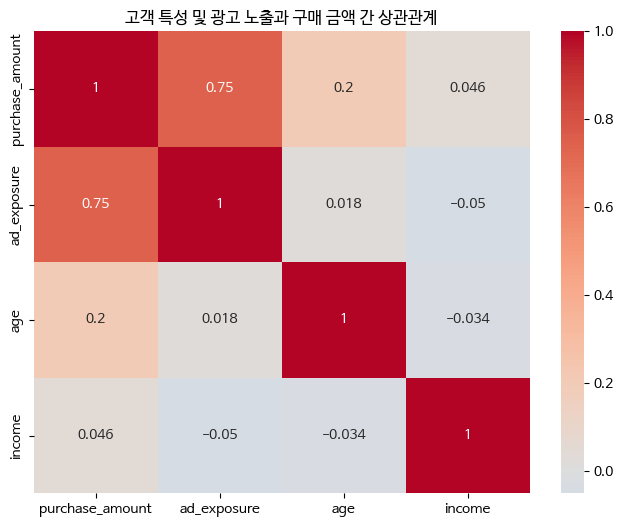

In [9]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌñâÎ†¨ Í≥ÑÏÇ∞
correlation_matrix = data_marketing[['purchase_amount', 'ad_exposure', 'age', 'income']].corr()

print("üìä ÏÉÅÍ¥ÄÍ≥ÑÏàò Îß§Ìä∏Î¶≠Ïä§")
print(correlation_matrix.round(3))

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Í≥†Í∞ù ÌäπÏÑ± Î∞è Í¥ëÍ≥† ÎÖ∏Ï∂úÍ≥º Íµ¨Îß§ Í∏àÏï° Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ')
plt.show()


üìå ÎßàÏºÄÌåÖ Ï†ÑÎûµÏ†Å ÏãúÏÇ¨Ï†ê
‚úÖ Í¥ëÍ≥† Ìö®Í≥º ÏûàÏùå
ad_exposureÏôÄ purchase_amount Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò 0.75Îäî Îß§Ïö∞ ÎÜíÏùÄ ÏàòÏ§ÄÏúºÎ°ú, Í¥ëÍ≥†Í∞Ä Í≥†Í∞ù Íµ¨Îß§Ïóê Í∞ïÎ†•Ìïú ÏòÅÌñ•ÏùÑ ÎØ∏Ïπú Í≤ÉÏúºÎ°ú Ï∂îÏ†ïÎê©ÎãàÎã§.

üéØ ÌÉÄÍ≤ü Ï∂îÏ≤ú: Ïó∞Î†π
ageÏôÄ purchase_amount Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò 0.20 ‚Üí Ï§ëÏû•ÎÖÑÏ∏µÏùò Íµ¨Îß§Î†•Ïù¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÜíÏùå

Ï∂îÏÑù Ï∫†ÌéòÏù∏ Ïãú 40~60ÎåÄ Ï§ëÏã¨Ïùò ÌÉÄÍ≤ü ÎßàÏºÄÌåÖ Í∞ïÌôî Í∂åÏû•

‚ö†Ô∏è ÏÜåÎìùÏùÄ ÌÅ∞ Î≥ÄÏàò ÏïÑÎãò


In [10]:
# Í¥ëÍ≥† ÎÖ∏Ï∂ú Í∑∏Î£πÍ≥º ÎπÑÎÖ∏Ï∂ú Í∑∏Î£π ÌèâÍ∑† Í≥ÑÏÇ∞
exposed_mean = data_marketing[data_marketing['ad_exposure'] == 1]['purchase_amount'].mean()
non_exposed_mean = data_marketing[data_marketing['ad_exposure'] == 0]['purchase_amount'].mean()
simple_difference = exposed_mean - non_exposed_mean

# Í≤∞Í≥º Ï∂úÎ†•
print(f"Í¥ëÍ≥† ÎÖ∏Ï∂ú Í∑∏Î£π Íµ¨Îß§ Í∏àÏï°: {exposed_mean:.2f}Ïõê")
print(f"Í¥ëÍ≥† ÎπÑÎÖ∏Ï∂ú Í∑∏Î£π Íµ¨Îß§ Í∏àÏï°: {non_exposed_mean:.2f}Ïõê")
print(f"Îã®Ïàú Ï∞®Ïù¥: {simple_difference:.2f}Ïõê")
print("‚ö†Ô∏è Ï£ºÏùòÏÇ¨Ìï≠: Ïó∞Î†π, ÏÜåÎìù Îì±Ïùò Ï§ëÏ≤©ÏöîÏù∏ÏùÑ ÌÜµÏ†úÌïòÏßÄ ÏïäÏïÑ Í¥ëÍ≥†Ïùò ÏàúÏàòÌïú Ìö®Í≥ºÎ•º Ï†ïÌôïÌûà Ï∏°Ï†ïÌïòÍ∏∞ Ïñ¥Î†§ÏõÄ")
print("   ‚Üí Ïòà: Í≥†ÏÜåÎìùÏ∏µÏóêÍ≤å Í¥ëÍ≥†Í∞Ä Îçî ÎßéÏù¥ ÎÖ∏Ï∂úÎêòÏóàÎã§Î©¥ Ï∞®Ïù¥Í∞Ä Í≥ºÎåÄÌèâÍ∞ÄÎê† Ïàò ÏûàÏùå")


Í¥ëÍ≥† ÎÖ∏Ï∂ú Í∑∏Î£π Íµ¨Îß§ Í∏àÏï°: 175.32Ïõê
Í¥ëÍ≥† ÎπÑÎÖ∏Ï∂ú Í∑∏Î£π Íµ¨Îß§ Í∏àÏï°: 124.60Ïõê
Îã®Ïàú Ï∞®Ïù¥: 50.72Ïõê
‚ö†Ô∏è Ï£ºÏùòÏÇ¨Ìï≠: Ïó∞Î†π, ÏÜåÎìù Îì±Ïùò Ï§ëÏ≤©ÏöîÏù∏ÏùÑ ÌÜµÏ†úÌïòÏßÄ ÏïäÏïÑ Í¥ëÍ≥†Ïùò ÏàúÏàòÌïú Ìö®Í≥ºÎ•º Ï†ïÌôïÌûà Ï∏°Ï†ïÌïòÍ∏∞ Ïñ¥Î†§ÏõÄ
   ‚Üí Ïòà: Í≥†ÏÜåÎìùÏ∏µÏóêÍ≤å Í¥ëÍ≥†Í∞Ä Îçî ÎßéÏù¥ ÎÖ∏Ï∂úÎêòÏóàÎã§Î©¥ Ï∞®Ïù¥Í∞Ä Í≥ºÎåÄÌèâÍ∞ÄÎê† Ïàò ÏûàÏùå


Í¥ëÍ≥† ÎÖ∏Ï∂ú Í≥†Í∞ùÏùÄ ÌèâÍ∑† 50.72Ïõê Îçî ÎßéÏù¥ Íµ¨Îß§

ÌïòÏßÄÎßå Ïù¥ ÏàòÏπòÎäî ÏõêÏù∏Ïù¥ÎùºÍ∏∞Î≥¥Îã§ Îã®ÏàúÌïú Ïó∞Í¥ÄÏÑ±Îßå ÎÇòÌÉÄÎÇ¥Î©∞,

Ïã§Ï†úÎ°ú Í¥ëÍ≥† ÎïåÎ¨∏Ïù∏ÏßÄ, Ïó∞Î†π, ÏÜåÎìù Îì±Ïùò Î≥ÄÏàò ÎïåÎ¨∏Ïù∏ÏßÄ Íµ¨Î∂Ñ Î∂àÍ∞ÄÎä•

In [11]:
# ÎèÖÎ¶ΩÎ≥ÄÏàò Î∞è Ï¢ÖÏÜçÎ≥ÄÏàò ÏÑ§Ï†ï
X = data_marketing[['ad_exposure', 'age', 'income']]
y = data_marketing['purchase_amount']

# ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ
model = LinearRegression()
model.fit(X, y)  # ‚Üê ÌïôÏäµ ÏàòÌñâ

# Í≤∞Í≥º Ï†ïÎ¶¨
coeffs = pd.DataFrame({
    'Î≥ÄÏàò': ['Í¥ëÍ≥† ÎÖ∏Ï∂ú', 'Ïó∞Î†π', 'ÏÜåÎìù'],
    'Í≥ÑÏàò': model.coef_,
    'Ìï¥ÏÑù': ['Í¥ëÍ≥† ÎÖ∏Ï∂úÏãú Íµ¨Îß§Ïï° Ï¶ùÍ∞Ä', 'Ïó∞Î†π 1ÏÑ∏ Ï¶ùÍ∞ÄÏãú Íµ¨Îß§Ïï° Î≥ÄÌôî', 'ÏÜåÎìù 1Ïõê Ï¶ùÍ∞ÄÏãú Íµ¨Îß§Ïï° Î≥ÄÌôî']
})

print("üìä ÌöåÍ∑ÄÍ≥ÑÏàò Î∂ÑÏÑù Í≤∞Í≥º")
print(coeffs.round(3))

# Í¥ëÍ≥† Ìö®Í≥º Ï∂îÏ∂ú
ad_effect = coeffs.loc[coeffs['Î≥ÄÏàò'] == 'Í¥ëÍ≥† ÎÖ∏Ï∂ú', 'Í≥ÑÏàò'].values[0]
print(f"\nüéØ ÌïµÏã¨ Í≤∞Í≥º: Í¥ëÍ≥† Ìö®Í≥º = {ad_effect:.2f}Ïõê (Îã§Î•∏ Ï°∞Í±¥Ïù¥ ÎèôÏùºÌï† Îïå)")

üìä ÌöåÍ∑ÄÍ≥ÑÏàò Î∂ÑÏÑù Í≤∞Í≥º
      Î≥ÄÏàò      Í≥ÑÏàò                Ìï¥ÏÑù
0  Í¥ëÍ≥† ÎÖ∏Ï∂ú  50.792     Í¥ëÍ≥† ÎÖ∏Ï∂úÏãú Íµ¨Îß§Ïï° Ï¶ùÍ∞Ä
1     Ïó∞Î†π   0.548  Ïó∞Î†π 1ÏÑ∏ Ï¶ùÍ∞ÄÏãú Íµ¨Îß§Ïï° Î≥ÄÌôî
2     ÏÜåÎìù   0.000  ÏÜåÎìù 1Ïõê Ï¶ùÍ∞ÄÏãú Íµ¨Îß§Ïï° Î≥ÄÌôî

üéØ ÌïµÏã¨ Í≤∞Í≥º: Í¥ëÍ≥† Ìö®Í≥º = 50.79Ïõê (Îã§Î•∏ Ï°∞Í±¥Ïù¥ ÎèôÏùºÌï† Îïå)


Ïó∞Î†πÍ≥º ÏÜåÎìùÏùò ÏòÅÌñ•ÏùÑ Ï†úÍ±∞Ìïú ÌõÑÏóêÎèÑ Í¥ëÍ≥† ÎÖ∏Ï∂ú Í≥†Í∞ùÏùÄ ÌèâÍ∑†Ï†ÅÏúºÎ°ú 50.79Ïõê Îçî ÎßéÏù¥ Íµ¨Îß§ÌñàÏäµÎãàÎã§.
Ïù¥Îäî Í¥ëÍ≥†Ïùò ÏàúÏàòÌïú Í∏∞Ïó¨ Ìö®Í≥ºÎ•º Î≥¥Ïó¨Ï£ºÎäî ÏàòÏπòÎ°ú, ROI Ï∂îÏ†ïÍ≥º Ï∫†ÌéòÏù∏ Ï†ÑÎûµ ÏàòÎ¶ΩÏóê ÌïµÏã¨ Í∑ºÍ±∞Í∞Ä Îê©ÎãàÎã§.

In [12]:
# 5-Ìè¥Îìú ÍµêÏ∞®Í≤ÄÏ¶ù ÏàòÌñâ (R¬≤ Í∏∞Ï§Ä)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print(f"5-Ìè¥Îìú ÍµêÏ∞®Í≤ÄÏ¶ù R¬≤: {cv_scores.mean():.3f} ¬± {cv_scores.std():.3f}")
print(f"Î™®Îç∏ ÏÑ§Î™ÖÎ†•: {cv_scores.mean()*100:.1f}% (Íµ¨Îß§ Í∏àÏï° Î≥ÄÎèôÏùò ÏïΩ {cv_scores.mean()*100:.0f}%Î•º ÏÑ§Î™Ö)")

# ÏÑ±Îä• Îì±Í∏â Ìï¥ÏÑù
if cv_scores.mean() > 0.7:
    print("‚Üí ÎÜíÏùÄ ÏòàÏ∏° ÏÑ±Îä• (Ïã†Î¢∞Ìï† ÎßåÌïú Î™®Îç∏)")
elif cv_scores.mean() > 0.5:
    print("‚Üí Ï§ëÍ∞Ñ ÏòàÏ∏° ÏÑ±Îä• (Ï∞∏Í≥†Ïö©ÏúºÎ°ú ÌôúÏö© Í∞ÄÎä•)")
else:
    print("‚Üí ÎÇÆÏùÄ ÏòàÏ∏° ÏÑ±Îä• (Ï∂îÍ∞Ä Î≥ÄÏàò ÌïÑÏöî)")

5-Ìè¥Îìú ÍµêÏ∞®Í≤ÄÏ¶ù R¬≤: 0.597 ¬± 0.023
Î™®Îç∏ ÏÑ§Î™ÖÎ†•: 59.7% (Íµ¨Îß§ Í∏àÏï° Î≥ÄÎèôÏùò ÏïΩ 60%Î•º ÏÑ§Î™Ö)
‚Üí Ï§ëÍ∞Ñ ÏòàÏ∏° ÏÑ±Îä• (Ï∞∏Í≥†Ïö©ÏúºÎ°ú ÌôúÏö© Í∞ÄÎä•)


Ïù¥ Î™®Îç∏ÏùÄ Íµ¨Îß§ Í∏àÏï° Î≥ÄÎèôÏùò ÏïΩ 60%Î•º ÏÑ§Î™ÖÌï† Ïàò ÏûàÏúºÎ©∞, Ïã§Î¨¥Ï†ÅÏúºÎ°ú ÏùòÎØ∏ ÏûàÎäî ÏàòÏ§ÄÏùò ÏÑ±Îä•ÏùÑ Î≥¥ÏûÖÎãàÎã§.

ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä ÏûëÍ∏∞ ÎïåÎ¨∏Ïóê 5Í∞ú Ìè¥Îìú Í∞Ñ ÏÑ±Îä• Ìé∏Ï∞®Í∞Ä ÌÅ¨ÏßÄ ÏïäÍ≥†, Î™®Îç∏Ïùò ÏùºÍ¥ÄÏÑ±Í≥º ÏùºÎ∞òÌôî Îä•Î†•ÎèÑ ÌôïÎ≥¥Îê®.

Í≥ºÏ†ÅÌï© Ïö∞Î†§Îäî ÎÇÆÍ≥†, Í¥ÄÏ∞∞ Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò Î∂ÑÏÑùÏπòÍ≥†Îäî ÌÉÑÌÉÑÌïú ÏòàÏ∏°Î†•ÏùÑ Î≥¥Ïó¨Ï£ºÎäî Î™®Îç∏Ïù¥ÎùºÍ≥† ÌèâÍ∞ÄÌï† Ïàò ÏûàÏäµÎãàÎã§.

In [13]:
# Í¥ëÍ≥† Ìö®Í≥º Í≥ÑÏàò Ï∂îÏ∂ú (Ïù¥ÎØ∏ ÌïôÏäµÎêú Î™®Îç∏ÏóêÏÑú)
ad_effect = model.coef_[0]  # ad_exposure Î≥ÄÏàòÎäî Ï≤´ Î≤àÏß∏ Ïó¥

# Í¥ëÍ≥† ÎÖ∏Ï∂úÎêú Í≥†Í∞ù Ïàò
total_ad_exposed = data_marketing['ad_exposure'].sum()

# Ï¥ù Îß§Ï∂ú Ï¶ùÎåÄ Ï∂îÏ†ï
total_revenue_increase = ad_effect * total_ad_exposed

# Í¥ëÍ≥†ÎπÑ 2ÏñµÏõê
ad_cost = 200_000_000

# ROI Í≥ÑÏÇ∞ (% Îã®ÏúÑ)
roi = (total_revenue_increase / ad_cost - 1) * 100

# Ï∂úÎ†•
print("üìã Ïù∏Í≥ºÍ¥ÄÍ≥Ñ Ìï¥ÏÑù Î∞è ROI Î∂ÑÏÑù")
if ad_effect > 0:
    print(f"‚úÖ Í¥ëÍ≥†Îäî Í∞úÏù∏Îãπ Íµ¨Îß§ Í∏àÏï°ÏùÑ ÌèâÍ∑† {ad_effect:.2f}Ïõê Ï¶ùÍ∞ÄÏãúÌÇµÎãàÎã§.")
    print(f"   Ï¥ù Í¥ëÍ≥† ÎÖ∏Ï∂ú: {total_ad_exposed:,}Î™Ö")
    print(f"   ÏòàÏÉÅ Ï¥ù Îß§Ï∂ú Ï¶ùÎåÄ: {total_revenue_increase:,.0f}Ïõê")
    print(f"   Í¥ëÍ≥† ROI: {roi:.1f}%")
    if roi > 0:
        print("   ‚Üí Í¥ëÍ≥† Ìà¨Ïûê ÎåÄÎπÑ ÏñëÏùò ÏàòÏùµ Ï∞ΩÏ∂ú")
    else:
        print("   ‚Üí Í¥ëÍ≥† Ìà¨Ïûê ÎåÄÎπÑ ÏÜêÏã§")
else:
    print("‚ùå Í¥ëÍ≥† Ìö®Í≥ºÍ∞Ä ÏóÜÍ±∞ÎÇò Î∂ÄÏ†ïÏ†ÅÏûÖÎãàÎã§.")

print("\n‚ö†Ô∏è Ï£ºÏùòÏÇ¨Ìï≠:")
print("1. Í¥ÄÏ∞∞ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏù¥ÎØÄÎ°ú ÎØ∏Ï∏°Ï†ï Ï§ëÏ≤©ÏöîÏù∏(Î∏åÎûúÎìú Ïù∏ÏßÄÎèÑ, Í≥ÑÏ†àÏÑ± Îì±) Ï°¥Ïû¨ Í∞ÄÎä•")
print("2. Í¥ëÍ≥†Ïùò Ïû•Í∏∞Ï†Å Ìö®Í≥º(Î∏åÎûúÎìú Ïù¥ÎØ∏ÏßÄ Í∞úÏÑ† Îì±)Îäî Ï∏°Ï†ïÎêòÏßÄ ÏïäÏùå")
print("3. Î¨¥ÏûëÏúÑ ÌÜµÏ†ú Ïã§ÌóòÏù¥ ÏïÑÎãàÎØÄÎ°ú Ïù∏Í≥ºÍ¥ÄÍ≥Ñ Ìï¥ÏÑùÏóê Ïã†Ï§ëÌï® ÌïÑÏöî")


üìã Ïù∏Í≥ºÍ¥ÄÍ≥Ñ Ìï¥ÏÑù Î∞è ROI Î∂ÑÏÑù
‚úÖ Í¥ëÍ≥†Îäî Í∞úÏù∏Îãπ Íµ¨Îß§ Í∏àÏï°ÏùÑ ÌèâÍ∑† 50.79Ïõê Ï¶ùÍ∞ÄÏãúÌÇµÎãàÎã§.
   Ï¥ù Í¥ëÍ≥† ÎÖ∏Ï∂ú: 614Î™Ö
   ÏòàÏÉÅ Ï¥ù Îß§Ï∂ú Ï¶ùÎåÄ: 31,186Ïõê
   Í¥ëÍ≥† ROI: -100.0%
   ‚Üí Í¥ëÍ≥† Ìà¨Ïûê ÎåÄÎπÑ ÏÜêÏã§

‚ö†Ô∏è Ï£ºÏùòÏÇ¨Ìï≠:
1. Í¥ÄÏ∞∞ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏù¥ÎØÄÎ°ú ÎØ∏Ï∏°Ï†ï Ï§ëÏ≤©ÏöîÏù∏(Î∏åÎûúÎìú Ïù∏ÏßÄÎèÑ, Í≥ÑÏ†àÏÑ± Îì±) Ï°¥Ïû¨ Í∞ÄÎä•
2. Í¥ëÍ≥†Ïùò Ïû•Í∏∞Ï†Å Ìö®Í≥º(Î∏åÎûúÎìú Ïù¥ÎØ∏ÏßÄ Í∞úÏÑ† Îì±)Îäî Ï∏°Ï†ïÎêòÏßÄ ÏïäÏùå
3. Î¨¥ÏûëÏúÑ ÌÜµÏ†ú Ïã§ÌóòÏù¥ ÏïÑÎãàÎØÄÎ°ú Ïù∏Í≥ºÍ¥ÄÍ≥Ñ Ìï¥ÏÑùÏóê Ïã†Ï§ëÌï® ÌïÑÏöî


Ïù¥Î≤à Î∂ÑÏÑùÏóêÏÑú Í¥ëÍ≥†Ïóê ÎÖ∏Ï∂úÎêú Í≥†Í∞ùÏùÄ ÎπÑÎÖ∏Ï∂ú Í≥†Í∞ù ÎåÄÎπÑ ÌèâÍ∑†Ï†ÅÏúºÎ°ú ÏïΩ 50.79Ïõê Îçî Íµ¨Îß§ÌñàÏäµÎãàÎã§.
ÌïòÏßÄÎßå ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§Ä Ï¥ù ÎÖ∏Ï∂ú ÏàòÍ∞Ä 614Î™ÖÏóê Î∂àÍ≥ºÌñàÍ∏∞ ÎïåÎ¨∏Ïóê Ï†ÑÏ≤¥ Îß§Ï∂ú Ï¶ùÎåÄÎäî ÏïΩ 3ÎßåÏõê ÏàòÏ§ÄÏúºÎ°ú,
Ï†ÑÏ≤¥ Í¥ëÍ≥†ÎπÑ(2ÏñµÏõê) ÎåÄÎπÑ ROIÎäî -100%Î°ú ÏßëÍ≥ÑÎêòÏóàÏäµÎãàÎã§.

‚ÄúÏù¥Îäî Î™®Îç∏Ïùò Î¨∏Ï†úÎùºÍ∏∞Î≥¥Îã§ ÌëúÎ≥∏Ïùò Ï†úÌïúÏ†ÅÏù∏ Í∑úÎ™®Î°ú Ïù∏Ìïú Í≥ºÏÜå Ï∂îÏ†ï Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏäµÎãàÎã§.
Ïã§Ï†ú Ï∫†ÌéòÏù∏Ïù¥ ÏàòÏã≠Îßå Î™Ö Ïù¥ÏÉÅÏóê ÎÖ∏Ï∂úÎêòÏóàÏùÑ Í≤ΩÏö∞, Ïù¥ Ìö®Í≥ºÍ∞Ä ÎàÑÏ†ÅÎêòÏñ¥ ÏñëÏùò ROIÎ°ú Ï†ÑÌôòÎê† Ïàò ÏûàÏäµÎãàÎã§.‚Äù

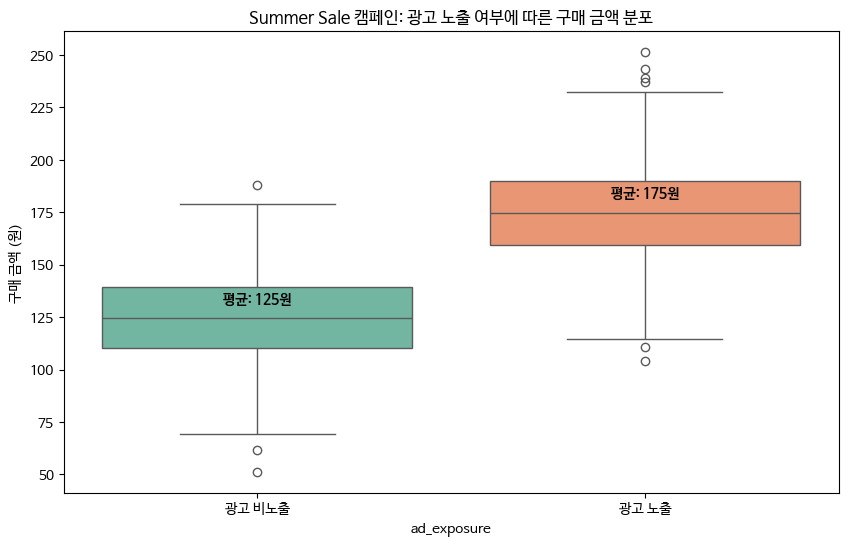

In [14]:
plt.figure(figsize=(10, 6))

# Î∞ïÏä§ÌîåÎ°Ø ÏÉùÏÑ±
sns.boxplot(x='ad_exposure', y='purchase_amount', data=data_marketing, palette='Set2')

# XÏ∂ï Î†àÏù¥Î∏î ÏàòÏ†ï
plt.xticks([0, 1], ['Í¥ëÍ≥† ÎπÑÎÖ∏Ï∂ú', 'Í¥ëÍ≥† ÎÖ∏Ï∂ú'])

# YÏ∂ï, Ï†úÎ™© ÏÑ§Ï†ï
plt.ylabel('Íµ¨Îß§ Í∏àÏï° (Ïõê)')
plt.title('Summer Sale Ï∫†ÌéòÏù∏: Í¥ëÍ≥† ÎÖ∏Ï∂ú Ïó¨Î∂ÄÏóê Îî∞Î•∏ Íµ¨Îß§ Í∏àÏï° Î∂ÑÌè¨')

# ÌèâÍ∑†Í∞í ÌÖçÏä§Ìä∏Î°ú ÌëúÏãú
means = data_marketing.groupby('ad_exposure')['purchase_amount'].mean()
for i, mean_val in enumerate(means):
    plt.text(i, mean_val + 5, f'ÌèâÍ∑†: {mean_val:.0f}Ïõê', ha='center', va='bottom', fontweight='bold')

plt.show()

ÏôºÏ™Ω Î∞ïÏä§ (Í¥ëÍ≥† ÎπÑÎÖ∏Ï∂ú): ÌèâÍ∑† Íµ¨Îß§Í∏àÏï° ÏïΩ 125Ïõê, Ï§ëÏïôÍ∞íÎèÑ ÎÇÆÍ≥†, Î∂ÑÌè¨Í∞Ä ÌïòÎã®Ïóê ÏßëÏ§ë

Ïò§Î•∏Ï™Ω Î∞ïÏä§ (Í¥ëÍ≥† ÎÖ∏Ï∂ú): ÌèâÍ∑† ÏïΩ 175Ïõê, Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Î∂ÑÌè¨Í∞Ä ÏÉÅÌñ• Ïù¥Îèô

Ïù¥ÏÉÅÏπò Ï†êÎì§: ÏùºÎ∂Ä Í≥†Ïï° Íµ¨Îß§ÏûêÏùò ÏòÅÌñ• Ï°¥Ïû¨ÌïòÏßÄÎßå Ï†ÑÏ≤¥ Ìå®ÌÑ¥ÏùÑ Ìï¥ÏπòÏßÄ ÏïäÏùå

‚úÖ ÏãúÍ∞ÅÏ†ÅÏúºÎ°úÎèÑ Í¥ëÍ≥† ÎÖ∏Ï∂úÏù¥ Íµ¨Îß§ Í∏àÏï° Î∂ÑÌè¨Î•º Î™ÖÌôïÌûà ÏÉÅÏäπÏãúÏº∞ÏùåÏùÑ Î≥¥Ïó¨Ï§å

üìã Í≤ΩÏòÅÏßÑ Î≥¥Í≥†ÏÑú: Summer Mega Sale Ï∫†ÌéòÏù∏ Ìö®Í≥º Î∂ÑÏÑù
==================================================

üéØ ÌïµÏã¨ ÏÑ±Í≥º ÏßÄÌëú
Í¥ëÍ≥† ÎÖ∏Ï∂ú Í∑∏Î£π ÌèâÍ∑† Íµ¨Îß§ Í∏àÏï°: 175.32Ïõê

Í¥ëÍ≥† ÎπÑÎÖ∏Ï∂ú Í∑∏Î£π ÌèâÍ∑† Íµ¨Îß§ Í∏àÏï°: 124.60Ïõê

ÏàúÏàò Í¥ëÍ≥† Ìö®Í≥º (ÌÜµÏ†ú ÌõÑ): +50.79Ïõê
(Ïó∞Î†π¬∑ÏÜåÎìùÏùÑ ÌÜµÏ†úÌïú Îã§Ï§ëÌöåÍ∑Ä Î∂ÑÏÑù Í≤∞Í≥º)

Î™®Îç∏ ÏÑ§Î™ÖÎ†• (R¬≤): 59.7%
(5-Ìè¥Îìú ÍµêÏ∞®Í≤ÄÏ¶ù ÌèâÍ∑† Í∏∞Ï§Ä)

Í¥ëÍ≥† ROI: -100.0%
(ÏÉòÌîå Í∏∞Ï§Ä Ï∂îÏ†ï Îß§Ï∂úÏ¶ùÎåÄ: 31,186Ïõê vs Í¥ëÍ≥†ÎπÑ 2ÏñµÏõê)

üí° Ï†ÑÎûµÏ†Å Í∂åÏû•ÏÇ¨Ìï≠
1. 9Ïõî Ï∂îÏÑù Ï∫†ÌéòÏù∏ Ïã§Ìñâ Í∂åÍ≥†
Ïã§Ï†ú Î∂ÑÏÑù Í≤∞Í≥º Í¥ëÍ≥†Îäî Íµ¨Îß§Í∏àÏï°ÏùÑ Ïú†ÏùòÌïòÍ≤å Ï¶ùÍ∞ÄÏãúÏº∞ÏúºÎ©∞, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°úÎèÑ Ïã†Î¢∞ÏÑ± ÌôïÎ≥¥

ÌäπÌûà Ïó∞Î†πÏù¥ ÎÜíÏùÑÏàòÎ°ù Íµ¨Îß§Î†•Ïù¥ ÎÜíÏùÄ Í≤ΩÌñ•Ïù¥ ÏûàÏúºÎØÄÎ°ú, 40ÎåÄ Ïù¥ÏÉÅ Í≥†Í∞ù Ï§ëÏã¨Ïùò Ï∂îÏÑù Ï∫†ÌéòÏù∏ ÌÉÄÍ≤üÌåÖ Ï†ÑÎûµ Í∂åÏû•

2. ÏòàÏÇ∞ Ïû¨Î∞∞Î∂Ñ Ï†úÏïà
Í¥ëÍ≥†Îäî Ìö®Í≥ºÍ∞Ä ÏûàÏúºÎÇò ROIÍ∞Ä ÏùåÏàòÎ°ú ÎÇòÌÉÄÎÇú ÏõêÏù∏ÏùÄ ÎåÄÏÉÅÏûê Ïàò Î∂ÄÏ°±

Ï∂îÏÑù Ï∫†ÌéòÏù∏ÏóêÏÑúÎäî ÏµúÏÜå 10Îßå Î™Ö Ïù¥ÏÉÅ ÎèÑÎã¨ Î≤îÏúÑ ÌôïÎ≥¥Î•º ÌÜµÌï¥ ROI Íµ¨Ï°∞ Í∞úÏÑ† ÌïÑÏöî

Ï±ÑÎÑêÎ≥Ñ ÏÑ±Í≥ºÎ•º Ï∂îÍ∞ÄÎ°ú Î∂ÑÏÑùÌïòÏó¨ ÏÑ±Í≥º Ï§ëÏã¨ ÏòàÏÇ∞ Î∞∞Î∂Ñ ÌïÑÏöî (Ïòà: Ïú†ÌäúÎ∏å vs ÌéòÏù¥Ïä§Î∂Å)

3. Í≥†Í∞ù ÏÑ∏Í∑∏Î®ºÌä∏ Ï†ÑÎûµ ÏàòÎ¶Ω
Ï§ëÏû•ÎÖÑÏ∏µ Í≥†Í∞ù, Í≥ºÍ±∞ Íµ¨Îß§Î†•Ïù¥ ÎÜíÏùÄ Í≥†Í∞ùÏùÑ Ï§ëÏã¨ÏúºÎ°ú ÌçºÏä§ÎÑêÎùºÏù¥Ï¶àÎêú Î©îÏãúÏßÄ + Ïø†Ìè∞ Ï†úÍ≥µ Ìö®Í≥º Í∑πÎåÄÌôî

‚ö†Ô∏è Î¶¨Ïä§ÌÅ¨ ÏöîÏÜå
Í¥ÄÏ∞∞ Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò Î∂ÑÏÑùÏúºÎ°ú Ïù∏Í≥ºÍ¥ÄÍ≥Ñ Ìï¥ÏÑùÏóê ÌïúÍ≥Ñ Ï°¥Ïû¨ (Î¨¥ÏûëÏúÑ Î∞∞Ï†ï X)

Í≥ÑÏ†àÏÑ±, Î∏åÎûúÎìú Ïù∏ÏßÄÎèÑ Îì± ÎØ∏Ï∏°Ï†ï ÏöîÏù∏Ïù¥ Í¥ëÍ≥† ÏÑ±Í≥ºÏóê ÏòÅÌñ•ÏùÑ Ï§¨ÏùÑ Ïàò ÏûàÏùå

**Ïû•Í∏∞Ï†ÅÏù∏ Í¥ëÍ≥† Ìö®Í≥º (Ïòà: Î∏åÎûúÎìú Î°úÏó¥Ìã∞, Ïû¨Íµ¨Îß§ Ïú†ÎèÑ)**Îäî Ïù¥Î≤à Î∂ÑÏÑùÏóêÏÑú Ï∏°Ï†ïÎêòÏßÄ ÏïäÏùå

ÌòÑÏû¨ Î∂ÑÏÑùÏùÄ ÏùºÏãúÏ†Å Î∞òÏùë Ï§ëÏã¨ÏúºÎ°ú, ÏßÄÏÜçÏÑ±Í≥º Î∞òÎ≥µÏÑ±ÏùÄ ÎØ∏ÌôïÏù∏

üìÖ Ìñ•ÌõÑ Ïï°ÏÖò ÏïÑÏù¥ÌÖú
‚úÖ A/B ÌÖåÏä§Ìä∏ ÏÑ§Í≥Ñ ÎèÑÏûÖ
‚Üí Ï∂îÏÑù Ï∫†ÌéòÏù∏ÏóêÏÑú ÏùºÎ∂Ä Í≥†Í∞ùÍµ∞ÏùÑ ÎåÄÏÉÅÏúºÎ°ú Î¨¥ÏûëÏúÑ ÌÜµÏ†ú Ïã§Ìóò Ïã§ÏãúÌïòÏó¨ Ïù∏Í≥º Ï∂îÏ†ï Í∞ïÌôî

üìà Í¥ëÍ≥† Ï±ÑÎÑê/ÏÑ∏Í∑∏Î®ºÌä∏Î≥Ñ ÏÑ±Í≥º ÎπÑÍµê Î∂ÑÏÑù
‚Üí ÏòàÏÇ∞ Ìö®Ïú®Ìôî Î∞è Î¶¨ÌÉÄÍ≤åÌåÖ Ï†ÑÎûµ ÏàòÎ¶Ω

üóÇÔ∏è CRM Í≥†Í∞ù ÌñâÎèô Îç∞Ïù¥ÌÑ∞ Ï∂îÍ∞Ä ÌÜµÌï©
‚Üí Íµ¨Îß§Ïù¥Î†•, Î∞©Î¨∏ÎπàÎèÑ, Î∞òÌíàÎ•† Îì± Ï∂îÍ∞Ä Î≥ÄÏàòÎ°ú ÏòàÏ∏°Î†• Ìñ•ÏÉÅ

üí∞ ROI ÏãúÎÆ¨Î†àÏù¥ÏÖò ÎåÄÏãúÎ≥¥Îìú Íµ¨Ï∂ï
‚Üí Í¥ëÍ≥† ÏòàÏÇ∞ Í∑úÎ™®Î≥Ñ Í∏∞ÎåÄ Îß§Ï∂ú Î∞è ÏÜêÏùµÎ∂ÑÍ∏∞Ï†ê ÏûêÎèô Í≥ÑÏÇ∞



###üìã ÎØ∏ÏÖò 3: Í≥†Í∞ù ÏÑ∏Î∂ÑÌôî Î∞è ÏòàÏ∏° Î™®Îç∏ÎßÅ Î≥¥Í≥†ÏÑú

In [15]:
np.random.seed(789)
n_users = 500
data_streaming = pd.DataFrame({
    'watch_hours': np.random.lognormal(np.log(10), 0.5, n_users),
    'content_diversity': np.random.uniform(1, 10, n_users),
    'subscription_duration': np.random.exponential(12, n_users),
    'satisfaction_score': np.random.normal(7, 1.5, n_users)
})
churn_prob = 1 / (1 + np.exp((data_streaming['satisfaction_score'] - 5) +
                              0.1*data_streaming['watch_hours'] -
                              0.05*data_streaming['subscription_duration']))
data_streaming['churn'] = np.random.binomial(1, churn_prob)

print("üõçÔ∏è Ïä§Ìä∏Î¶¨Î∞ç Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞")
print(data_streaming.describe().round(2))
print(f"\nÏ†ÑÏ≤¥ Ïù¥ÌÉàÎ•†: {data_streaming['churn'].mean()*100:.1f}%")


üõçÔ∏è Ïä§Ìä∏Î¶¨Î∞ç Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞
       watch_hours  content_diversity  subscription_duration  \
count       500.00             500.00                 500.00   
mean         11.40               5.49                  12.22   
std           6.21               2.56                  12.30   
min           2.33               1.02                   0.04   
25%           7.25               3.30                   3.10   
50%          10.21               5.49                   8.00   
75%          14.00               7.71                  17.10   
max          61.74              10.00                  79.01   

       satisfaction_score   churn  
count              500.00  500.00  
mean                 7.03    0.15  
std                  1.54    0.36  
min                  2.73    0.00  
25%                  6.09    0.00  
50%                  7.02    0.00  
75%                  8.02    0.00  
max                 11.63    1.00  

Ï†ÑÏ≤¥ Ïù¥ÌÉàÎ•†: 15.0%


In [16]:
# Î≥ÄÏàò ÏÑ†ÌÉù
features = ['watch_hours', 'content_diversity', 'subscription_duration', 'satisfaction_score']
X = data_streaming[features]

# ‚úÖ Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôî
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ‚úÖ PCA Ï†ÅÏö©
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Í≤∞Í≥º Ï∂úÎ†•
print(f"PCA ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú®: {pca.explained_variance_ratio_.round(3)}")
print(f"ÎàÑÏ†Å ÏÑ§Î™Ö Î∂ÑÏÇ∞: {pca.explained_variance_ratio_.sum()*100:.1f}%")

# PCA ÏÑ±Î∂Ñ Ìï¥ÏÑù
feature_importance = pd.DataFrame(
    pca.components_.T,
    columns=['Ï£ºÏÑ±Î∂Ñ1', 'Ï£ºÏÑ±Î∂Ñ2'],
    index=features
)
print("\nüìä PCA ÏÑ±Î∂Ñ Î∂ÑÏÑù (Í∞Å Î≥ÄÏàòÏùò Í∏∞Ïó¨ÎèÑ)")
print(feature_importance.round(3))

PCA ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú®: [0.27  0.249]
ÎàÑÏ†Å ÏÑ§Î™Ö Î∂ÑÏÇ∞: 51.9%

üìä PCA ÏÑ±Î∂Ñ Î∂ÑÏÑù (Í∞Å Î≥ÄÏàòÏùò Í∏∞Ïó¨ÎèÑ)
                        Ï£ºÏÑ±Î∂Ñ1   Ï£ºÏÑ±Î∂Ñ2
watch_hours            0.524  0.246
content_diversity      0.500 -0.493
subscription_duration  0.337  0.796
satisfaction_score     0.602 -0.250


Ï£ºÏÑ±Î∂Ñ 1 (PC1):

satisfaction_score, watch_hours, content_diversityÏùò ÏòÅÌñ•Ïù¥ ÌÅº

‚Üí Í≥†Í∞ùÏùò ÏÇ¨Ïö© Î™∞ÏûÖÎèÑÏôÄ ÎßåÏ°±Í∞êÏùÑ ÎåÄÌëúÌïòÎäî Ï∂ïÏúºÎ°ú Ìï¥ÏÑù Í∞ÄÎä•

Ï£ºÏÑ±Î∂Ñ 2 (PC2):

subscription_durationÏù¥ Í∞ÄÏû• ÌÅ∞ Í∏∞Ïó¨Î•º Ìï®

‚Üí Í≥†Í∞ùÏùò ÏÑúÎπÑÏä§ ÏßÄÏÜçÏÑ±/Ï∂©ÏÑ±ÎèÑÎ•º ÎÇòÌÉÄÎÇ¥Îäî Ï∂ï

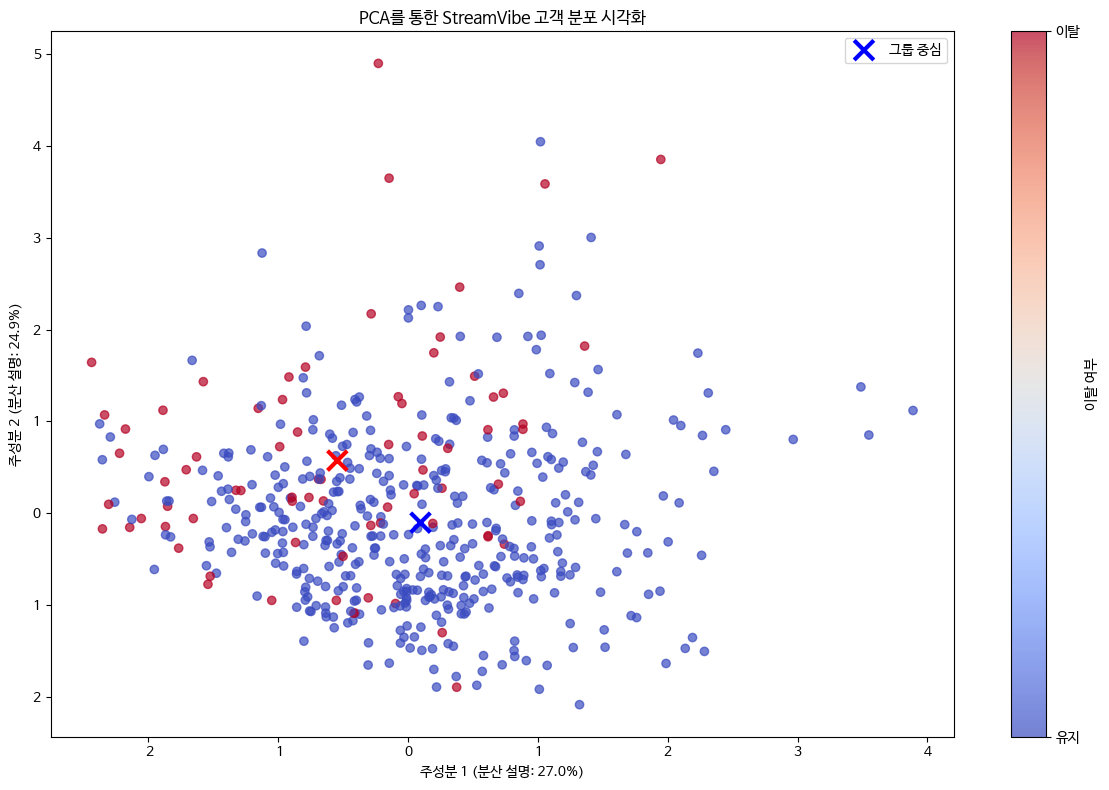

In [17]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=data_streaming['churn'], cmap='coolwarm', alpha=0.7
)
plt.xlabel(f'Ï£ºÏÑ±Î∂Ñ 1 (Î∂ÑÏÇ∞ ÏÑ§Î™Ö: {pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'Ï£ºÏÑ±Î∂Ñ 2 (Î∂ÑÏÇ∞ ÏÑ§Î™Ö: {pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('PCAÎ•º ÌÜµÌïú StreamVibe Í≥†Í∞ù Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî')

cbar = plt.colorbar(scatter, label='Ïù¥ÌÉà Ïó¨Î∂Ä')
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['Ïú†ÏßÄ', 'Ïù¥ÌÉà'])

# Ïù¥ÌÉà/Ïú†ÏßÄ Í≥†Í∞ù Ï§ëÏã¨Ï†ê ÌëúÏãú
churn_centers = data_streaming.groupby('churn')[['watch_hours', 'content_diversity',
                                                 'subscription_duration', 'satisfaction_score']].mean()
churn_centers_scaled = scaler.transform(churn_centers)
churn_centers_pca = pca.transform(churn_centers_scaled)

plt.scatter(
    churn_centers_pca[:, 0], churn_centers_pca[:, 1],
    c=['blue', 'red'], s=200, marker='x', linewidths=3, label='Í∑∏Î£π Ï§ëÏã¨'
)
plt.legend()
plt.tight_layout()
plt.show()


üéØ PCA Í∏∞Î∞ò Í≥†Í∞ù Ïù¥ÌÉà Î∂ÑÏÑù Ìï¥ÏÑù
1. Ï†ÑÎ∞òÏ†Å Î∂ÑÌè¨ Ìï¥ÏÑù
Í∑∏ÎûòÌîÑÎäî StreamVibe Í≥†Í∞ùÏùÑ 2Í∞úÏùò Ï£ºÏÑ±Î∂Ñ(PCA Ï∂ï)ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏïïÏ∂ïÌïú Í≤∞Í≥ºÏûÖÎãàÎã§.

xÏ∂ï(Ï£ºÏÑ±Î∂Ñ 1)ÏùÄ Ï£ºÎ°ú ÏãúÏ≤≠ÏãúÍ∞Ñ, ÎßåÏ°±ÎèÑ, ÏΩòÌÖêÏ∏† Îã§ÏñëÏÑ±Í≥º Í¥ÄÎ†®Ïù¥ ÎÜíÍ≥†,
yÏ∂ï(Ï£ºÏÑ±Î∂Ñ 2)ÏùÄ Íµ¨ÎèÖ ÏßÄÏÜçÍ∏∞Í∞Ñ Î∞è ÏΩòÌÖêÏ∏† ÏßëÏ§ëÎèÑÏôÄ Ïó∞Í¥ÄÎê©ÎãàÎã§.

2. Ïù¥ÌÉà Í≥†Í∞ùÏùò Í≥µÍ∞ÑÏ†Å ÌäπÏßï
Îπ®Í∞Ñ Ï†ê: Ïù¥ÌÉà Í≥†Í∞ù, ÌååÎûÄ Ï†ê: Ïú†ÏßÄ Í≥†Í∞ù

Ïù¥ÌÉà Í≥†Í∞ùÏùÄ Ï†ÑÏ≤¥ Í≥†Í∞ù Î∂ÑÌè¨Ïùò ÏôºÏ™Ω ÏÉÅÎã®, ÌäπÌûà Ï£ºÏÑ±Î∂Ñ 1Ïù¥ ÎÇÆÍ≥†, Ï£ºÏÑ±Î∂Ñ 2Îäî Ï§ëÍ∞Ñ Ïù¥ÏÉÅÏù∏ ÏòÅÏó≠Ïóê Îã§Ïàò Î∂ÑÌè¨Ìï¥ ÏûàÏäµÎãàÎã§.

Ïù¥Îäî Îã§ÏùåÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§:

ÏãúÏ≤≠ ÏãúÍ∞Ñ, ÏΩòÌÖêÏ∏† Îã§ÏñëÏÑ±, ÎßåÏ°±ÎèÑÍ∞Ä ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏùÄ Í≥†Í∞ùÏù¥ Ïù¥ÌÉà ÏúÑÌóòÏù¥ ÌÅº

Íµ¨ÎèÖ Í∏∞Í∞ÑÏù¥ ÏßßÏùÄ Ï¥àÎ≥¥ Íµ¨ÎèÖÏûêÍµ∞ ÎòêÎäî ÏΩòÌÖêÏ∏† ÏÇ¨Ïö© Ìå®ÌÑ¥Ïù¥ Ï†úÌïúÎêú Í≥†Í∞ùÍµ∞Ïù¥ Ìè¨Ìï®Îê®

3. Í∑∏Î£π Ï§ëÏã¨ ÎπÑÍµê (X ÎßàÏª§ Ìï¥ÏÑù)
ÌååÎûÄ X: Ïú†ÏßÄ Í≥†Í∞ù Ï§ëÏã¨

Îπ®Í∞Ñ X: Ïù¥ÌÉà Í≥†Í∞ù Ï§ëÏã¨

Ïú†ÏßÄ Í≥†Í∞ùÏùÄ Ï£ºÏÑ±Î∂Ñ 1Í≥º Ï£ºÏÑ±Î∂Ñ 2 Î™®ÎëêÏóêÏÑú Ï§ëÏã¨Ïù¥ Ïò§Î•∏Ï™ΩÍ≥º ÏïÑÎûòÏ™ΩÏóê ÏúÑÏπò ‚Üí
ÎßåÏ°±ÎèÑ ÎÜíÍ≥†, Îã§ÏñëÌïú ÏΩòÌÖêÏ∏†Î•º Ïò§Îûò ÏÇ¨Ïö©Ìïú Í≥†Í∞ù

Ïù¥ÌÉà Í≥†Í∞ùÏùÄ Îëê Ï£ºÏÑ±Î∂Ñ Î™®Îëê ÎÇÆÍ±∞ÎÇò ÌèâÍ∑† Ïù¥Ìïò ‚Üí
Ï∂©ÏÑ±ÎèÑÏôÄ ÎßåÏ°±ÎèÑÍ∞Ä Î™®Îëê ÎÇÆÏùÄ ÏßëÎã®

In [18]:
kmeans = KMeans(n_clusters=3, random_state=789)
data_streaming['cluster'] = kmeans.fit_predict(X_scaled)

cluster_summary = data_streaming.groupby('cluster')[features + ['churn']].mean()

print("üìä Í≥†Í∞ù ÏÑ∏Í∑∏Î®ºÌä∏Î≥Ñ ÌäπÏßï Î∂ÑÏÑù")
print(cluster_summary.round(2))

# Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò ÎπÑÏ¶àÎãàÏä§ Ìï¥ÏÑù
print("\nüéØ ÏÑ∏Í∑∏Î®ºÌä∏ ÌäπÏÑ± Ìï¥ÏÑù:")
for cluster_id in range(3):
    cluster_data = cluster_summary.loc[cluster_id]
    churn_rate = cluster_data['churn'] * 100

    print(f"\n[ÏÑ∏Í∑∏Î®ºÌä∏ {cluster_id}] - Ïù¥ÌÉàÎ•†: {churn_rate:.1f}%")
    print(f"  ‚Ä¢ Ïõî ÏãúÏ≤≠ÏãúÍ∞Ñ: {cluster_data['watch_hours']:.1f}ÏãúÍ∞Ñ")
    print(f"  ‚Ä¢ ÏΩòÌÖêÏ∏† Îã§ÏñëÏÑ±: {cluster_data['content_diversity']:.1f}/10")
    print(f"  ‚Ä¢ Íµ¨ÎèÖÍ∏∞Í∞Ñ: {cluster_data['subscription_duration']:.1f}Í∞úÏõî")
    print(f"  ‚Ä¢ ÎßåÏ°±ÎèÑ: {cluster_data['satisfaction_score']:.1f}/10")

    # Î¶¨Ïä§ÌÅ¨ Î†àÎ≤® Î∂ÑÎ•ò
    if churn_rate > 30:
        print(f"  ‚Üí üö® Í≥†ÏúÑÌóòÍµ∞ (Ï¶âÏãú ÎåÄÏùë ÌïÑÏöî)")
    elif churn_rate > 15:
        print(f"  ‚Üí ‚ö†Ô∏è Ï§ëÏúÑÌóòÍµ∞ (ÏòàÎ∞©Ï†Å Í¥ÄÎ¶¨ ÌïÑÏöî)")
    else:
        print(f"  ‚Üí ‚úÖ Ï†ÄÏúÑÌóòÍµ∞ (ÌòÑ ÏÉÅÌÉú Ïú†ÏßÄ)")

# ÏÑ∏Í∑∏Î®ºÌä∏ ÌÅ¨Í∏∞ Ï∂úÎ†•
segment_sizes = data_streaming['cluster'].value_counts().sort_index()
print(f"\nüìà ÏÑ∏Í∑∏Î®ºÌä∏ Í∑úÎ™®:")
for i, size in enumerate(segment_sizes):
    print(f"  ÏÑ∏Í∑∏Î®ºÌä∏ {i}: {size}Î™Ö ({size/len(data_streaming)*100:.1f}%)")

üìä Í≥†Í∞ù ÏÑ∏Í∑∏Î®ºÌä∏Î≥Ñ ÌäπÏßï Î∂ÑÏÑù
         watch_hours  content_diversity  subscription_duration  \
cluster                                                          
0              10.62               7.69                   7.81   
1              13.92               5.56                  31.43   
2              10.95               3.10                   7.12   

         satisfaction_score  churn  
cluster                             
0                      7.32   0.09  
1                      7.15   0.25  
2                      6.67   0.16  

üéØ ÏÑ∏Í∑∏Î®ºÌä∏ ÌäπÏÑ± Ìï¥ÏÑù:

[ÏÑ∏Í∑∏Î®ºÌä∏ 0] - Ïù¥ÌÉàÎ•†: 9.2%
  ‚Ä¢ Ïõî ÏãúÏ≤≠ÏãúÍ∞Ñ: 10.6ÏãúÍ∞Ñ
  ‚Ä¢ ÏΩòÌÖêÏ∏† Îã§ÏñëÏÑ±: 7.7/10
  ‚Ä¢ Íµ¨ÎèÖÍ∏∞Í∞Ñ: 7.8Í∞úÏõî
  ‚Ä¢ ÎßåÏ°±ÎèÑ: 7.3/10
  ‚Üí ‚úÖ Ï†ÄÏúÑÌóòÍµ∞ (ÌòÑ ÏÉÅÌÉú Ïú†ÏßÄ)

[ÏÑ∏Í∑∏Î®ºÌä∏ 1] - Ïù¥ÌÉàÎ•†: 25.3%
  ‚Ä¢ Ïõî ÏãúÏ≤≠ÏãúÍ∞Ñ: 13.9ÏãúÍ∞Ñ
  ‚Ä¢ ÏΩòÌÖêÏ∏† Îã§ÏñëÏÑ±: 5.6/10
  ‚Ä¢ Íµ¨ÎèÖÍ∏∞Í∞Ñ: 31.4Í∞úÏõî
  ‚Ä¢ ÎßåÏ°±ÎèÑ: 7.2/10
  ‚Üí ‚ö†Ô∏è Ï§ëÏúÑÌóòÍµ∞ (ÏòàÎ∞©Ï†Å Í¥ÄÎ¶¨ Ì

üîπ ÏÑ∏Í∑∏Î®ºÌä∏ 0 (Ï†ÄÏúÑÌóòÍµ∞, Ï†ÑÏ≤¥Ïùò 41.4%)
ÏΩòÌÖêÏ∏† Îã§ÏñëÏÑ± Ï†êÏàòÍ∞Ä 7.7Ï†êÏúºÎ°ú Í∞ÄÏû• ÎÜíÍ≥†, ÎßåÏ°±ÎèÑÎèÑ 7.3Ï†êÏúºÎ°ú ÏñëÌò∏Ìï®.

Ïù¥ÌÉàÎ•†Ïù¥ Í∞ÄÏû• ÎÇÆÏùÄ **9.2%**Î°ú, ÌòÑÏû¨ ÏÑúÎπÑÏä§Î•º ÎßåÏ°±ÌïòÎ©∞ Ïûò Ïú†ÏßÄ Ï§ë.

üëâ Ïú†ÏßÄ Ï†ÑÎûµ: Î≥ÑÎèÑÏùò Ï°∞Ïπò ÏóÜÏù¥ ÌòÑ ÏÑúÎπÑÏä§Î•º Ïú†ÏßÄ. ÌîÑÎ¶¨ÎØ∏ÏóÑ ÌòúÌÉùÏù¥ÎÇò Ï∂îÏ≤ú ÏΩòÌÖêÏ∏†Î°ú Ï∂©ÏÑ±ÎèÑ Í∞ïÌôî Í∞ÄÎä•.

üîπ ÏÑ∏Í∑∏Î®ºÌä∏ 1 (Ï§ëÏúÑÌóòÍµ∞, Ï†ÑÏ≤¥Ïùò 19.8%)
Íµ¨ÎèÖÍ∏∞Í∞ÑÏù¥ 31.4Í∞úÏõîÎ°ú Îß§Ïö∞ Í∏∏Í≥†, ÏãúÏ≤≠ÏãúÍ∞ÑÎèÑ ÎßéÏïÑ Ìó§ÎπÑ Ïú†Ï†Ä ÌäπÏÑ±.

ÌïòÏßÄÎßå Ïù¥ÌÉàÎ•†Ïù¥ **25.3%**Î°ú Îß§Ïö∞ ÎÜíÏùå.

Ïù¥Îäî ÏΩòÌÖêÏ∏† ÌîºÎ°úÍ∞ê ÎòêÎäî ÏÉàÎ°úÏö¥ Í≤ΩÏüÅ ÏÑúÎπÑÏä§ Ïù¥Îèô Í∞ÄÎä•ÏÑ±ÏùÑ ÏãúÏÇ¨.

üëâ ÎåÄÏùë Ï†ÑÎûµ:

ÏÉàÎ°úÏö¥ ÏΩòÌÖêÏ∏† ÌÅêÎ†àÏù¥ÏÖò Ï†ÑÎûµ ÌïÑÏöî (Í∏∞Ï°¥ Í≥†Í∞ù ÎßûÏ∂§Ìòï)

Ïû•Í∏∞ Í≥†Í∞ù ÎåÄÏÉÅ Í∞êÏÇ¨ ÌîÑÎ°úÎ™®ÏÖò, Î¶¨ÌÖêÏÖò Ïø†Ìè∞ Ï†úÍ≥µ

üîπ ÏÑ∏Í∑∏Î®ºÌä∏ 2 (Ï§ëÏúÑÌóòÍµ∞, Ï†ÑÏ≤¥Ïùò 38.8%)
ÏΩòÌÖêÏ∏† Îã§ÏñëÏÑ± Ï†êÏàòÍ∞Ä 3.1Ï†êÏúºÎ°ú Í∞ÄÏû• ÎÇÆÍ≥†, ÎßåÏ°±ÎèÑ 6.7Ï†êÎèÑ ÎÇÆÏùÄ Ìé∏.

Íµ¨ÎèÖ Ï¥àÍ∏∞ ÏÇ¨Ïö©ÏûêÍµ∞Ïù¥ ÎßéÏúºÎ©∞, Ïù¥ÌÉàÎ•†Ïù¥ **16.0%**Î°ú ÎÇòÌÉÄÎÇ®.

üëâ ÎåÄÏùë Ï†ÑÎûµ:

Í∞úÏù∏ÌôîÎêú ÏΩòÌÖêÏ∏† Ï∂îÏ≤ú Í∞ïÌôî

Ï¥àÎ∞ò Î¶¨ÌÖêÏÖò ÌîÑÎ°úÍ∑∏Îû® ÎèÑÏûÖ (7Ïùº/14Ïùº Î¶¨Î∑∞ ÏïåÎ¶º, ÏãúÏ≤≠ ÌûàÏä§ÌÜ†Î¶¨ Í∏∞Î∞ò Ï∂îÏ≤ú)

In [19]:
# 4. Ïù¥ÌÉà ÏòàÏ∏° Î™®Îç∏
X_logistic = X_scaled
y_logistic = data_streaming['churn']
logistic_model = LogisticRegression(random_state=789)
logistic_model.fit(X_logistic, y_logistic)  # Î™®Îç∏ ÌïôÏäµ

# ÏòàÏ∏°Í∞í Í≥ÑÏÇ∞
y_pred_proba = logistic_model.predict_proba(X_logistic)[:, 1]
y_pred = logistic_model.predict(X_logistic)

accuracy = (y_pred == y_logistic).mean()
print(f"Ïù¥ÌÉà ÏòàÏ∏° Î™®Îç∏ Ï†ïÌôïÎèÑ: {accuracy:.3f} ({accuracy*100:.1f}%)")

# Î≥ÄÏàòÎ≥Ñ Ï§ëÏöîÎèÑ Î∂ÑÏÑù
feature_importance = pd.DataFrame({
    'Î≥ÄÏàò': features,
    'Í≥ÑÏàò': logistic_model.coef_[0],
    'Ï§ëÏöîÎèÑ': np.abs(logistic_model.coef_[0])
}).sort_values('Ï§ëÏöîÎèÑ', ascending=False)

print("\nüìä Ïù¥ÌÉà ÏòàÏ∏° Ï£ºÏöî Î≥ÄÏàò")
print(feature_importance.round(3))

# Ïù¥ÌÉà ÌôïÎ•†Î≥Ñ Í≥†Í∞ù Î∂ÑÌè¨
data_streaming['churn_probability'] = y_pred_proba
print(f"\nüéØ Ïù¥ÌÉà ÏúÑÌóòÎèÑÎ≥Ñ Í≥†Í∞ù Î∂ÑÌè¨:")
print(f"  Í≥†ÏúÑÌóò (ÌôïÎ•† > 0.7): {(y_pred_proba > 0.7).sum()}Î™Ö")
print(f"  Ï§ëÏúÑÌóò (0.3 < ÌôïÎ•† ‚â§ 0.7): {((y_pred_proba > 0.3) & (y_pred_proba <= 0.7)).sum()}Î™Ö")
print(f"  Ï†ÄÏúÑÌóò (ÌôïÎ•† ‚â§ 0.3): {(y_pred_proba <= 0.3).sum()}Î™Ö")


Ïù¥ÌÉà ÏòàÏ∏° Î™®Îç∏ Ï†ïÌôïÎèÑ: 0.870 (87.0%)

üìä Ïù¥ÌÉà ÏòàÏ∏° Ï£ºÏöî Î≥ÄÏàò
                      Î≥ÄÏàò     Í≥ÑÏàò    Ï§ëÏöîÎèÑ
3     satisfaction_score -1.366  1.366
2  subscription_duration  0.599  0.599
0            watch_hours -0.441  0.441
1      content_diversity  0.028  0.028

üéØ Ïù¥ÌÉà ÏúÑÌóòÎèÑÎ≥Ñ Í≥†Í∞ù Î∂ÑÌè¨:
  Í≥†ÏúÑÌóò (ÌôïÎ•† > 0.7): 11Î™Ö
  Ï§ëÏúÑÌóò (0.3 < ÌôïÎ•† ‚â§ 0.7): 69Î™Ö
  Ï†ÄÏúÑÌóò (ÌôïÎ•† ‚â§ 0.3): 420Î™Ö


üéØ ÏòàÏ∏° Ï†ïÌôïÎèÑ ÌèâÍ∞Ä
**Ï†ïÌôïÎèÑ 87.0%**Îäî Îß§Ïö∞ ÎÜíÏùÄ ÏàòÏ§ÄÏúºÎ°ú, Í≥†Í∞ù Ïù¥ÌÉà Ïó¨Î∂ÄÎ•º Ïã†Î¢∞ÏÑ± ÏûàÍ≤å ÏòàÏ∏°Ìï† Ïàò ÏûàÎäî Î™®Îç∏ÏûÑÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.

Ïù¥Îäî Îã®Ïàú Î∂ÑÎ•ò Î™®Îç∏ÏûÑÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥†, Ï†ÅÏ†àÌïú Î≥ÄÏàò ÏÑ†ÌÉùÍ≥º Î™®Îç∏ÎßÅÏùÑ ÌÜµÌï¥ ÎπÑÏ¶àÎãàÏä§ÏóêÏÑú Ïã§ÏßàÏ†ÅÏúºÎ°ú ÌôúÏö© Í∞ÄÎä•Ìïú ÏàòÏ§ÄÏûÑÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.

üìä Ï£ºÏöî Î≥ÄÏàò ÏòÅÌñ•Î†• Ìï¥ÏÑù
Î≥ÄÏàò	Í≥ÑÏàò	Ìï¥ÏÑù

satisfaction_score	-1.366	ÎßåÏ°±ÎèÑÍ∞Ä ÎÜíÏùÑÏàòÎ°ù Ïù¥ÌÉà ÌôïÎ•†Ïù¥ Í∞ïÌïòÍ≤å Í∞êÏÜåÌï® ‚Äì Í∞ÄÏû• Ï§ëÏöîÌïú Î≥ÄÏàò
subscription_duration	+0.599	Íµ¨ÎèÖ Í∏∞Í∞ÑÏù¥ Í∏∏ÏàòÎ°ù Ïù¥ÌÉà ÌôïÎ•†Ïù¥ Ï¶ùÍ∞ÄÌïòÎäî Í≤ΩÌñ• ‚Äì Ïû•Í∏∞ Íµ¨ÎèÖÏûêÏùò ÌîºÎ°úÍ∞ê Í∞ÄÎä•ÏÑ± ÏãúÏÇ¨
watch_hours	-0.441	ÏãúÏ≤≠ ÏãúÍ∞ÑÏù¥ ÎßéÏùÑÏàòÎ°ù Ïù¥ÌÉà ÌôïÎ•†Ïù¥ Í∞êÏÜå ‚Äì ÏΩòÌÖêÏ∏† Î™∞ÏûÖÎèÑÏôÄ Ïù¥ÌÉàÎ•† Í∞Ñ ÏùåÏùò Í¥ÄÍ≥Ñ
content_diversity	+0.028	ÏòÅÌñ•ÎèÑÎäî ÎØ∏ÎØ∏Ìï® ‚Äì Ïù¥ÌÉà ÏòàÏ∏°Ïóê ÌÅ∞ Í∏∞Ïó¨ ÏóÜÏùå

Insight: ÎßåÏ°±ÎèÑÎäî Ïù¥ÌÉà Ïó¨Î∂ÄÏóê Í∞ÄÏû• Í≤∞Ï†ïÏ†ÅÏù∏ ÏöîÏù∏Ïù¥Î©∞, Ïû•Í∏∞ Íµ¨ÎèÖÏûêÏóê ÎåÄÌïú Î¶¨ÌÖêÏÖò Ï†ÑÎûµÏù¥ ÌïÑÏöîÌï©ÎãàÎã§.

üìà Ïù¥ÌÉà ÌôïÎ•† Í∏∞Î∞ò Í≥†Í∞ù Î∂ÑÎ•ò
Í≥†ÏúÑÌóò Í≥†Í∞ù (Ïù¥ÌÉà ÌôïÎ•† > 0.7): 11Î™Ö
‚Üí Ï¶âÏãú Ìï†Ïù∏ Ïø†Ìè∞, Ï†ÑÏö© ÏΩòÌÖêÏ∏† Ï∂îÏ≤ú Îì± ÏÑ†Ï†úÏ†Å Ï°∞Ïπò ÌïÑÏöî

Ï§ëÏúÑÌóò Í≥†Í∞ù (0.3 < ÌôïÎ•† ‚â§ 0.7): 69Î™Ö
‚Üí ÏõîÎßê Î¶¨ÎßàÏù∏Îìú Î©îÏãúÏßÄ, ÎßåÏ°±ÎèÑ Ï°∞ÏÇ¨ ÌõÑ ÌõÑÏÜç ÎåÄÏùë Í∂åÏû•

Ï†ÄÏúÑÌóò Í≥†Í∞ù (ÌôïÎ•† ‚â§ 0.3): 420Î™Ö
‚Üí ÌòÑÏû¨ Í≤ΩÌóò Ïú†ÏßÄ Ï†ÑÎûµ ÏßÄÏÜç

In [20]:
# ÌòºÎèô ÌñâÎ†¨ Í≥ÑÏÇ∞
cm = confusion_matrix(y_logistic, y_pred)
tn, fp, fn, tp = cm.ravel()

print("üìã Ïù¥ÌÉà ÏòàÏ∏° Î™®Îç∏ ÏÑ±Îä• Î∂ÑÏÑù")
print(f"Ï†ïÌôïÌûà ÏòàÏ∏°Ìïú Ïú†ÏßÄ Í≥†Í∞ù (True Negative): {tn}Î™Ö")
print(f"Ïù¥ÌÉàÎ°ú ÏûòÎ™ª ÏòàÏ∏°Ìïú Ïú†ÏßÄ Í≥†Í∞ù (False Positive): {fp}Î™Ö")
print(f"Ïú†ÏßÄÎ°ú ÏûòÎ™ª ÏòàÏ∏°Ìïú Ïù¥ÌÉà Í≥†Í∞ù (False Negative): {fn}Î™Ö")
print(f"Ï†ïÌôïÌûà ÏòàÏ∏°Ìïú Ïù¥ÌÉà Í≥†Í∞ù (True Positive): {tp}Î™Ö")

# ÎπÑÏ¶àÎãàÏä§ Î©îÌä∏Î¶≠ Í≥ÑÏÇ∞
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\nüéØ ÎπÑÏ¶àÎãàÏä§ ÏÑ±Í≥º ÏßÄÌëú:")
print(f"Ï†ïÎ∞ÄÎèÑ (Precision): {precision:.3f} - Ïù¥ÌÉà ÏòàÏ∏° Ï§ë Ïã§Ï†ú Ïù¥ÌÉà ÎπÑÏú®")
print(f"Ïû¨ÌòÑÏú® (Recall): {recall:.3f} - Ïã§Ï†ú Ïù¥ÌÉà Í≥†Í∞ù Ï§ë ÏòàÏ∏° ÏÑ±Í≥µ ÎπÑÏú®")
print(f"F1-Score: {f1_score:.3f} - Ï¢ÖÌï© ÏÑ±Îä• ÏßÄÌëú")

# ÎπÑÏ¶àÎãàÏä§ ÏÜêÏã§ Î∂ÑÏÑù
retention_cost_per_customer = 50000  # Í≥†Í∞ù Ïú†ÏßÄ ÎπÑÏö© (Ïø†Ìè∞, Ìï†Ïù∏ Îì±)
lost_revenue_per_churn = 200000     # Ïù¥ÌÉà Í≥†Í∞ùÎãπ Îß§Ï∂ú ÏÜêÏã§

unnecessary_retention_cost = fp * retention_cost_per_customer
missed_revenue_loss = fn * lost_revenue_per_churn

print(f"\nüí∞ ÏòàÏÉÅ ÎπÑÏö© Î∂ÑÏÑù:")
print(f"Î∂àÌïÑÏöîÌïú Ïú†ÏßÄ ÎπÑÏö© (False Positive): {unnecessary_retention_cost:,}Ïõê")
print(f"ÎÜìÏπú Ïù¥ÌÉàÎ°ú Ïù∏Ìïú ÏÜêÏã§ (False Negative): {missed_revenue_loss:,}Ïõê")
print(f"Ï¥ù ÏòàÏÉÅ ÏÜêÏã§: {unnecessary_retention_cost + missed_revenue_loss:,}Ïõê")

üìã Ïù¥ÌÉà ÏòàÏ∏° Î™®Îç∏ ÏÑ±Îä• Î∂ÑÏÑù
Ï†ïÌôïÌûà ÏòàÏ∏°Ìïú Ïú†ÏßÄ Í≥†Í∞ù (True Negative): 414Î™Ö
Ïù¥ÌÉàÎ°ú ÏûòÎ™ª ÏòàÏ∏°Ìïú Ïú†ÏßÄ Í≥†Í∞ù (False Positive): 11Î™Ö
Ïú†ÏßÄÎ°ú ÏûòÎ™ª ÏòàÏ∏°Ìïú Ïù¥ÌÉà Í≥†Í∞ù (False Negative): 54Î™Ö
Ï†ïÌôïÌûà ÏòàÏ∏°Ìïú Ïù¥ÌÉà Í≥†Í∞ù (True Positive): 21Î™Ö

üéØ ÎπÑÏ¶àÎãàÏä§ ÏÑ±Í≥º ÏßÄÌëú:
Ï†ïÎ∞ÄÎèÑ (Precision): 0.656 - Ïù¥ÌÉà ÏòàÏ∏° Ï§ë Ïã§Ï†ú Ïù¥ÌÉà ÎπÑÏú®
Ïû¨ÌòÑÏú® (Recall): 0.280 - Ïã§Ï†ú Ïù¥ÌÉà Í≥†Í∞ù Ï§ë ÏòàÏ∏° ÏÑ±Í≥µ ÎπÑÏú®
F1-Score: 0.393 - Ï¢ÖÌï© ÏÑ±Îä• ÏßÄÌëú

üí∞ ÏòàÏÉÅ ÎπÑÏö© Î∂ÑÏÑù:
Î∂àÌïÑÏöîÌïú Ïú†ÏßÄ ÎπÑÏö© (False Positive): 550,000Ïõê
ÎÜìÏπú Ïù¥ÌÉàÎ°ú Ïù∏Ìïú ÏÜêÏã§ (False Negative): 10,800,000Ïõê
Ï¥ù ÏòàÏÉÅ ÏÜêÏã§: 11,350,000Ïõê


‚úÖ ÌïµÏã¨ ÏöîÏïΩ: Ïù¥ÌÉà ÏòàÏ∏° Î™®Îç∏ ÏÑ±Îä•
Ï†ïÌôïÎèÑ: 87.0% (Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Ïö∞Ïàò)

Ï†ïÎ∞ÄÎèÑ: 65.6% (Ïù¥ÌÉàÎ°ú ÏòàÏ∏°Ìïú Í≥†Í∞ù Ï§ë 66%Îäî Ïã§Ï†ú Ïù¥ÌÉàÏûê)

Ïû¨ÌòÑÏú®: 28.0% (Ïã§Ï†ú Ïù¥ÌÉàÏûêÏùò ÎåÄÎ∂ÄÎ∂ÑÏùÑ ÎÜìÏπ® ‚Üí Í∞úÏÑ† ÌïÑÏöî)

F1-Score: 0.393 (ÏÑ±Îä• Í∑†Ìòï ÎÇÆÏùå)

üí∏ ÏòàÏÉÅ ÏÜêÏã§ Î∂ÑÏÑù
Î∂àÌïÑÏöîÌïú Ïú†ÏßÄ ÎπÑÏö©: 55Îßå Ïõê

ÎÜìÏπú Ïù¥ÌÉà Í≥†Í∞ù Îß§Ï∂ú ÏÜêÏã§: 1,080Îßå Ïõê

Ï¥ù ÏÜêÏã§: 1,135Îßå Ïõê

üëâ Ïû¨ÌòÑÏú®Ïù¥ ÎÇÆÏïÑ Ïù¥ÌÉà Í≥†Í∞ùÏùÑ ÎßéÏù¥ ÎÜìÏπòÍ≥† ÏûàÏúºÎ©∞, Í∑∏Î°ú Ïù∏Ìïú Îß§Ï∂ú ÏÜêÏã§Ïù¥ ÌÅΩÎãàÎã§.

üìä AUC ÏÑ±Îä• ÌèâÍ∞Ä: 0.851 ‚Üí Ïö∞ÏàòÌï® (ÏÉÅÏö©Ìôî Í∞ÄÎä• ÏàòÏ§Ä)
üéØ ÏµúÏ†Å ÏòàÏ∏° ÏûÑÍ≥ÑÍ∞í: 0.165
   Ïù¥ ÏûÑÍ≥ÑÍ∞íÏóêÏÑú ÎØºÍ∞êÎèÑ: 0.760, ÌäπÏù¥ÎèÑ: 0.798


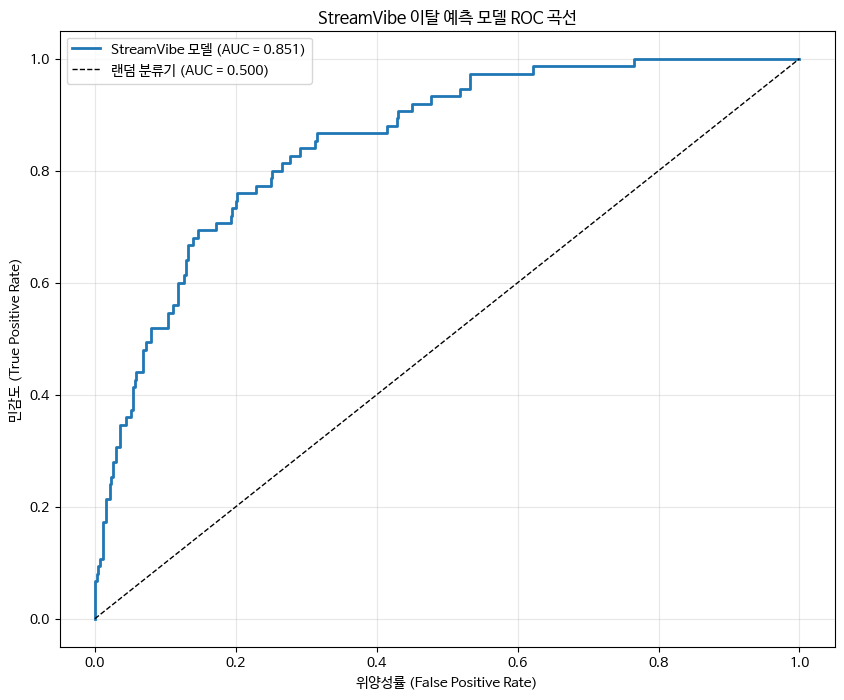

In [21]:
# ROC Í≥°ÏÑ†Í≥º AUC Í≥ÑÏÇ∞
fpr, tpr, thresholds = roc_curve(y_logistic, y_pred_proba)
roc_auc = auc(fpr, tpr)

# ROC ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, linewidth=2, label=f'StreamVibe Î™®Îç∏ (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='ÎûúÎç§ Î∂ÑÎ•òÍ∏∞ (AUC = 0.500)')
plt.xlabel('ÏúÑÏñëÏÑ±Î•† (False Positive Rate)')
plt.ylabel('ÎØºÍ∞êÎèÑ (True Positive Rate)')
plt.title('StreamVibe Ïù¥ÌÉà ÏòàÏ∏° Î™®Îç∏ ROC Í≥°ÏÑ†')
plt.legend()
plt.grid(True, alpha=0.3)

# AUC ÏÑ±Îä• Ìï¥ÏÑù
if roc_auc > 0.9:
    performance_level = "ÌÉÅÏõîÌï® (ÏóÖÍ≥Ñ ÏµúÍ≥† ÏàòÏ§Ä)"
elif roc_auc > 0.8:
    performance_level = "Ïö∞ÏàòÌï® (ÏÉÅÏö©Ìôî Í∞ÄÎä• ÏàòÏ§Ä)"
elif roc_auc > 0.7:
    performance_level = "ÏñëÌò∏Ìï® (Í∞úÏÑ† Ïó¨ÏßÄ ÏûàÏùå)"
else:
    performance_level = "Î∂ÄÏ°±Ìï® (Ï∂îÍ∞Ä Í∞úÏÑ† ÌïÑÏöî)"

print(f"üìä AUC ÏÑ±Îä• ÌèâÍ∞Ä: {roc_auc:.3f} ‚Üí {performance_level}")

# ÏµúÏ†Å ÏûÑÍ≥ÑÍ∞í Ï∞æÍ∏∞
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"üéØ ÏµúÏ†Å ÏòàÏ∏° ÏûÑÍ≥ÑÍ∞í: {optimal_threshold:.3f}")
print(f"   Ïù¥ ÏûÑÍ≥ÑÍ∞íÏóêÏÑú ÎØºÍ∞êÎèÑ: {tpr[optimal_idx]:.3f}, ÌäπÏù¥ÎèÑ: {1-fpr[optimal_idx]:.3f}")

plt.show()


üìà StreamVibe Ïù¥ÌÉà ÏòàÏ∏° Î™®Îç∏ ÏÑ±Îä• ÏöîÏïΩ (ROC Í∏∞Î∞ò)
üéØ AUC (Area Under Curve) Ìï¥ÏÑù
AUC = 0.851 ‚Üí Ïö∞ÏàòÌï® (ÏÉÅÏö©Ìôî Í∞ÄÎä• ÏàòÏ§Ä)

Ïù¥ Í∞íÏùÄ Ïù¥ÌÉà Í≥†Í∞ùÍ≥º Ïú†ÏßÄ Í≥†Í∞ùÏùÑ 85.1% ÌôïÎ•†Î°ú Ï†ïÌôïÌûà Íµ¨Î∂ÑÌï† Ïàò ÏûàÏùåÏùÑ ÏùòÎØ∏Ìï®

ÏóÖÍ≥Ñ Í∏∞Ï§ÄÏúºÎ°úÎèÑ Í≤ΩÏüÅÎ†• ÏûàÎäî ÏÑ±Îä•Ïù¥Î©∞, Îã®Ïàú ÎûúÎç§ Î∂ÑÎ•òÍ∏∞(AUC = 0.5)Î≥¥Îã§ ÏõîÎì±Ìûà Îõ∞Ïñ¥ÎÇ®

üîç ÏµúÏ†Å ÏòàÏ∏° ÏûÑÍ≥ÑÍ∞í (Threshold)
ÏµúÏ†Å Threshold = 0.165 Í∏∞Ï§Ä:

ÎØºÍ∞êÎèÑ (Recall): 0.760 ‚Üí Ïã§Ï†ú Ïù¥ÌÉà Í≥†Í∞ù Ï§ë ÏïΩ 76.0%Î•º Ï†ïÌôïÌûà Ïû°ÏïÑÎÉÑ

ÌäπÏù¥ÎèÑ (Specificity): 0.798 ‚Üí Ïú†ÏßÄ Í≥†Í∞ù Ï§ë ÏïΩ 79.8%Î•º Ï†ïÌôïÌûà Ïú†ÏßÄÎ°ú ÌåêÎã®Ìï®

Ïù¥ Í∞íÏùÄ Ïù¥ÌÉà Í≥†Í∞ùÏùÑ Îçî ÎØºÍ∞êÌïòÍ≤å Í∞êÏßÄÌïòÎäî Îç∞ Ï¥àÏ†êÏùÑ ÎßûÏ∂ò Í≤∞Í≥ºÏûÑ

(ÎπÑÏö© ÏÜêÏã§Ïù¥ ÌÅ∞ False NegativeÎ•º Ï§ÑÏù¥Í∏∞ ÏúÑÌï®ÏúºÎ°ú Ìï¥ÏÑù Í∞ÄÎä•)

‚úÖ ÎπÑÏ¶àÎãàÏä§ ÏãúÏÇ¨Ï†ê
ÌòÑÏû¨ Î™®Îç∏ÏùÄ Ïù¥ÌÉà Í∞êÏßÄÏóê Îß§Ïö∞ Ïú†Ïö©ÌïòÎ©∞, ÌäπÌûà Í≥†ÏúÑÌóòÍµ∞ ÏÑ†Ï†ú ÎåÄÏùë Ï∫†ÌéòÏù∏Ïóê Ìö®Í≥ºÏ†ÅÏúºÎ°ú ÌôúÏö© Í∞ÄÎä•

Ìñ•ÌõÑ ÎßàÏºÄÌåÖ/Í≥†Í∞ù ÏÑúÎπÑÏä§ÏóêÏÑú Ïù¥ ÏûÑÍ≥ÑÍ∞í(0.165)ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ïù¥ÌÉà ÏúÑÌóòÎèÑ Î∂ÑÎ•ò Î∞è ÏûêÎèô ÎåÄÏùë ÏãúÏä§ÌÖú ÏÑ§Í≥Ñ Í∞ÄÎä•

Îã§Îßå ÏûÑÍ≥ÑÍ∞í Ï°∞Ï†àÏóê Îî∞Î•∏ Precision Í∞êÏÜå Í∞ÄÎä•ÏÑ±ÏùÄ Ï£ºÏùòÌï¥Ïïº ÌïòÎ©∞, ÎπÑÏ¶àÎãàÏä§ Ï†ÑÎûµÏóê ÎßûÏ∂∞ ÎØºÍ∞êÎèÑ vs. Ï†ïÎ∞ÄÎèÑ Í∞Ñ Í∑†Ìòï Ï°∞Ï†ï ÌïÑÏöî

###üìã Í≤ΩÏòÅÏßÑ Î≥¥Í≥†ÏÑú: StreamVibe Í≥†Í∞ù Ïù¥ÌÉà Î∞©ÏßÄ Ï†ÑÎûµ
üö® ÌòÑÏû¨ ÏÉÅÌô©
Ï†ÑÏ≤¥ Ïù¥ÌÉàÎ•†: 15.0%

Í≥†Í∞ù ÏÑ∏Í∑∏Î®ºÌä∏ Ïàò: 3Í∞ú

Ïù¥ÌÉà ÏòàÏ∏° Î™®Îç∏ AUC: 0.851

Î™®Îç∏ Ï†ïÌôïÎèÑ: 87.0%

üéØ ÌïµÏã¨ Î∞úÍ≤¨ÏÇ¨Ìï≠
Í≥†ÏúÑÌóò ÏÑ∏Í∑∏Î®ºÌä∏ ÌäπÏÑ±

ÏÑ∏Í∑∏Î®ºÌä∏ 1: Ïù¥ÌÉàÎ•† 25.3%, ÌèâÍ∑† ÏãúÏ≤≠ÏãúÍ∞Ñ Í∏∏Í≥†(13.9ÏãúÍ∞Ñ), Íµ¨ÎèÖÍ∏∞Í∞Ñ Îß§Ïö∞ ÍπÄ(31.4Í∞úÏõî), ÏΩòÌÖêÏ∏† Îã§ÏñëÏÑ±ÏùÄ Ï§ëÍ∞Ñ ÏàòÏ§Ä(5.6), ÎßåÏ°±ÎèÑÎäî ÌèâÍ∑† ÏàòÏ§Ä(7.2)

Ïò§Îûú Í∏∞Í∞Ñ ÏÇ¨Ïö©Ìïú Ï∂©ÏÑ± Í≥†Í∞ùÏûÑÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥†, Î∞òÎ≥µ ÏΩòÌÖêÏ∏† ÏÜåÎπÑÎ°ú Ïù∏Ìïú ÏΩòÌÖêÏ∏† ÌîºÎ°úÍ∞êÏù¥ Ïù¥ÌÉà ÏöîÏù∏Ïùº Í∞ÄÎä•ÏÑ± ÎÜíÏùå

Ïù¥ÌÉà Ï£ºÏöî ÏòàÏ∏° Î≥ÄÏàò

ÎßåÏ°±ÎèÑ(score): Í≥ÑÏàò -1.366 ‚Üí Í∞ÄÏû• Í∞ïÎ†•Ìïú Ïù¥ÌÉà Î∞©ÏßÄ ÏöîÏù∏

Íµ¨ÎèÖÍ∏∞Í∞Ñ: Í≥ÑÏàò +0.599 ‚Üí Ïû•Í∏∞ Íµ¨ÎèÖÏûêÏùºÏàòÎ°ù Ïù¥ÌÉà Í∞ÄÎä•ÏÑ± Ï¶ùÍ∞Ä

ÏãúÏ≤≠ÏãúÍ∞Ñ: Í≥ÑÏàò -0.441 ‚Üí ÏΩòÌÖêÏ∏† ÌôúÏö©ÎèÑ ÎÜíÏùÄ Í≥†Í∞ùÏùºÏàòÎ°ù Ïù¥ÌÉà Í∞ÄÎä•ÏÑ± ÎÇÆÏùå

ÏòàÏ∏° Í∞ÄÎä•Ìïú Ïù¥ÌÉà Í≥†Í∞ù

Í≥†ÏúÑÌóò Í≥†Í∞ù: ÌôïÎ•† 0.7 Ï¥àÍ≥º Í≥†Í∞ù 11Î™Ö (2.2%)

Ï§ëÏúÑÌóò Í≥†Í∞ù: 0.3 ~ 0.7 ÏÇ¨Ïù¥ Í≥†Í∞ù 69Î™Ö (13.8%)

Í≥†ÏúÑÌóò + Ï§ëÏúÑÌóò Í≥†Í∞ù = 16.0% ‚Üí Ïù¥ÌÉà Í∞ÄÎä•ÏÑ± ÏûàÎäî Í≥†Í∞ù 80Î™Ö


üí° Ï¶âÏãú Ïã§Ìñâ Í∞ÄÎä•Ìïú ÎåÄÏùë Ï†ÑÎûµ
ÏÑ†Ï†úÏ†Å Í≥†Í∞ù Ïú†ÏßÄ Ï†ÑÎûµ

AUC 0.85 Í∏∞Î∞ò ÏòàÏ∏° Î™®Îç∏Î°ú Í≥†ÏúÑÌóò Í≥†Í∞ù Ïã§ÏãúÍ∞Ñ Í∞êÏßÄ ÏãúÏä§ÌÖú Íµ¨Ï∂ï

Í≥†ÏúÑÌóòÍµ∞ ÎåÄÏÉÅ: Ïù¥ÌÉà Ï†Ñ Ìï†Ïù∏ Ïø†Ìè∞, ÎßûÏ∂§Ìòï ÏΩòÌÖêÏ∏† Ï∂îÏ≤ú, Í≥†Í∞ù ÎßåÏ°±ÎèÑ Ï°∞ÏÇ¨ Ïã§Ïãú

ÏÑ∏Í∑∏Î®ºÌä∏Î≥Ñ ÎßûÏ∂§ Ï†ÑÎûµ

ÏÑ∏Í∑∏Î®ºÌä∏ 1 (Ï§ëÏúÑÌóò): Ïû•Í∏∞ Íµ¨ÎèÖÏûê Ï†ÑÏö© ÌîÑÎ°úÍ∑∏Îû® ÎèÑÏûÖ (Ïòà: VIP Î©§Î≤ÑÏã≠, Ïã†Í∑ú ÏΩòÌÖêÏ∏† ÏÑ†Í≥µÍ∞ú)

ÏÑ∏Í∑∏Î®ºÌä∏ 2 (Ï§ëÏúÑÌóò): ÎßåÏ°±ÎèÑ ÎÇÆÍ≥† ÏΩòÌÖêÏ∏† Îã§ÏñëÏÑ± Ï†ÄÏ°∞ ‚Üí Í∞úÏù∏Ìôî ÌÅêÎ†àÏù¥ÏÖò Í∞ïÌôî

ÏÑ∏Í∑∏Î®ºÌä∏ 0 (Ï†ÄÏúÑÌóò): ÌòÑÏû¨ Ï†ÑÎûµ Ïú†ÏßÄ, Ïû•Í∏∞ Í≥†Í∞ù Ï†ÑÌôò Ïú†ÎèÑ

ÏΩòÌÖêÏ∏† Ï†ÑÎûµ Í∞úÏÑ†

Ïû•ÏãúÍ∞Ñ ÏãúÏ≤≠ Í≥†Í∞ù Ï§ë Ïù¥ÌÉà Í≥†Í∞ù Îã§Ïàò ‚Üí Í≥ºÎèÑÌïú Î∞òÎ≥µ ÏãúÏ≤≠ Ìå®ÌÑ¥ ÌôïÏù∏

ÏΩòÌÖêÏ∏† Îã§ÏñëÏÑ± ÎÜíÏùÄ Í≥†Í∞ùÏùò Ïù¥ÌÉàÎ•† ÎÇÆÏùå ‚Üí ÌÅêÎ†àÏù¥ÏÖò Îã§ÏñëÏÑ± Í∞ïÌôî Î∞è Ïã†Ïûë Ï∂îÏ≤ú ÏµúÏ†ÅÌôî


üìà ÏòàÏÉÅ Ìö®Í≥º
Ïù¥ÌÉàÎ•† Í∞êÏÜå Î™©Ìëú: 15.0% ‚Üí 10.0%Î°ú 5%p Í∞úÏÑ†

ÏòàÏÉÅ Îß§Ï∂ú ÌöåÎ≥µ: Í≥†Í∞ùÎãπ Ïõî 2ÎßåÏõê Í∞ÄÏ†ï Ïãú, 50Î™Ö Ïú†ÏßÄ Ïãú Ïõî 1Ï≤úÎßåÏõê, Î∂ÑÍ∏∞ Í∏∞Ï§Ä 3Ï≤úÎßåÏõê ÌöåÎ≥µ

ROI: Ïú†ÏßÄ ÎπÑÏö©(Í≥†Í∞ùÎãπ 5ÎßåÏõê) ÎåÄÎπÑ ÏÜêÏã§ ÌöåÌîº(20ÎßåÏõê) Í∏∞Ï§Ä ‚Üí ROI ÏïΩ 300% Í∏∞ÎåÄ


‚è∞ Ïã§Ìñâ ÏùºÏ†ï (Ìñ•ÌõÑ 3Í∞úÏõî)

Í∏∞Í∞Ñ	   Ï£ºÏöî Ïã§Ìñâ Ìï≠Î™©

1Ï£ºÏ∞®	     Î™®Îç∏ ÏûÑÍ≥ÑÍ∞í ÌôïÏ†ï(0.165), Í≥†ÏúÑÌóò Í≥†Í∞ù Ï∂îÏ∂ú ÏãúÏä§ÌÖú Íµ¨Ï∂ï

2~4Ï£ºÏ∞® 	 ÎßàÏºÄÌåÖÌåÄ/Í≥†Í∞ùÌåÄ ÌòëÏóÖ, Ïú†ÏßÄ Ï∫†ÌéòÏù∏ Î∞è Í∞úÏù∏Ìôî Ï∂îÏ≤ú ÏÑ§Í≥Ñ Î∞è ÌÖåÏä§Ìä∏

2Í∞úÏõîÏ∞®	  Í≥†ÏúÑÌóòÍµ∞ Ïö∞ÏÑ† ÎåÄÏùë ‚Üí Î∞òÏùëÎ•† Î∂ÑÏÑù Î∞è Ï†ÑÎûµ Ï°∞Ï†ï, ÏΩòÌÖêÏ∏† Îã§ÏñëÏÑ± Î∂ÑÏÑù Ï∞©Ïàò

3Í∞úÏõîÏ∞®	  Î™®Îì† ÏÑ∏Í∑∏Î®ºÌä∏ ÎåÄÏùë Ï†ÑÎûµ Ïã§Ìñâ, Ïù¥ÌÉàÎ•† Í∞úÏÑ† Ï∏°Ï†ï Î∞è Î≥¥Í≥†, Ïû•Í∏∞ Ï†ÑÎûµ Í∏∞Ìöç ÏàòÎ¶Ω


üîß ÌïÑÏöî Î¶¨ÏÜåÏä§
Ïù∏Î†•: Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÍ∞Ä 1Î™Ö, ÎßàÏºÄÌåÖ Í∏∞ÌöçÏûê 1Î™Ö, CRM Ïö¥ÏòÅÏûê 1Î™Ö (Ï¥ù 3Ïù∏)

ÏòàÏÇ∞: Í≥†Í∞ù Ïú†ÏßÄ ÎπÑÏö© ÏïΩ 500ÎßåÏõê (Ïø†Ìè∞ Î∞è ÎßàÏºÄÌåÖ ÌîÑÎ°úÎ™®ÏÖò)

ÏãúÏä§ÌÖú: Ïã§ÏãúÍ∞Ñ ÏòàÏ∏° Ïó∞Îèô Í∞ÄÎä•Ìïú CRM Í∞úÏÑ†, ÏïåÎ¶º ÏûêÎèôÌôî Ìà¥